# READ DATASET total.csv

IsDomainIP
0.0    52569
1.0       89
Name: count, dtype: int64
{'Média': 33.3121652930229, 'Mediana': 27.0, 'Modo': 26.0, 'std_dev': 25.68600382734764, 'Percentagens': 0.25    23.0
0.50    27.0
0.75    34.0
Name: URLLength, dtype: float64}


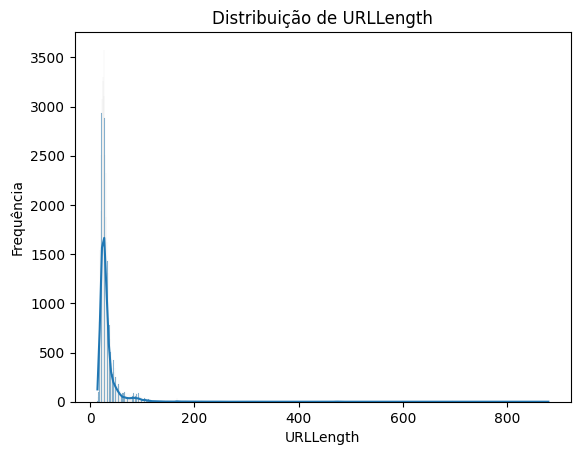

In [444]:
#estatistica
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import os


data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8')

def etatisticas_descritivas(data, column):
    media = data[column].mean()
    mediana = data[column].median()
    modo = data[column].mode()[0] if not data[column].mode().empty else 'N/A'
    std_dev = data[column].std()
    percentagens = data[column].quantile([0.25, 0.5, 0.75])

    return {
        "Média": media,
        "Mediana": mediana,
        "Modo": modo,
        "std_dev": std_dev,
        "Percentagens": percentagens
    }

stats = etatisticas_descritivas(df, 'URLLength')
print(stats)

def distribuicao_variavel(data, column):
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribuição de {column}")
    plt.xlabel(column)
    plt.ylabel("Frequência")
    plt.show()

distribuicao_variavel(df, 'URLLength')

# Remoção de colunas sem relevância e linhas em que o IP não se encontra preenchido

In [423]:
data_url = 'Datasets/total.csv'

# Read the dataset using pandas
df = pd.read_csv(data_url, delimiter=';', header=0, encoding='utf-8', low_memory=False)

# Adicionar uma coluna de ID única
df['ID'] = range(1, len(df) + 1)

# Verificar se a coluna 'IP' está presente
if 'IP' in df.columns:
    # Detectar registros onde o IP está nulo
    ips_nao_encontrados = df[df['IP'].isnull() | (df['IP'] == '')]

    # Contar o número de linhas com IPs não encontrados
    num_ips_nao_encontrados = len(ips_nao_encontrados)
    ids_ips_nao_encontrados = ips_nao_encontrados['ID'].tolist()

    # Exibir a contagem
    print("Número de registos com IPs não encontrados:")
    print(num_ips_nao_encontrados)
    print("Lista de Id's dos registos sem Ip's encontrados")
    print(ids_ips_nao_encontrados)
else:
    print("A coluna 'IP' não está presente no DataFrame.")

df['Postal'].fillna('ind', inplace=True)
df['Latitude'].fillna('ind', inplace=True)
df['Longitude'].fillna('ind', inplace=True)


Número de registos com IPs não encontrados:
17180
Lista de Id's dos registos sem Ip's encontrados
[22, 28, 30, 32, 33, 35, 41, 42, 45, 46, 51, 53, 55, 58, 60, 61, 74, 78, 81, 83, 88, 92, 101, 102, 105, 109, 110, 115, 121, 122, 126, 127, 139, 145, 148, 150, 152, 159, 162, 166, 168, 186, 194, 199, 212, 213, 217, 233, 234, 237, 243, 244, 246, 247, 248, 250, 257, 263, 267, 271, 276, 278, 285, 287, 288, 292, 296, 299, 300, 307, 308, 312, 313, 315, 316, 319, 320, 330, 334, 335, 337, 346, 352, 353, 357, 361, 363, 366, 369, 371, 374, 376, 377, 378, 379, 382, 388, 389, 395, 401, 402, 403, 413, 415, 416, 421, 422, 424, 425, 428, 432, 434, 443, 444, 445, 450, 453, 456, 459, 461, 463, 467, 470, 475, 478, 480, 481, 484, 485, 487, 493, 494, 495, 498, 499, 507, 512, 514, 516, 522, 523, 526, 529, 533, 535, 538, 542, 559, 561, 566, 570, 575, 576, 581, 583, 593, 601, 606, 608, 618, 622, 623, 629, 630, 639, 643, 644, 646, 653, 655, 675, 682, 687, 692, 695, 707, 708, 710, 724, 736, 738, 741, 746, 749, 750

C:\Users\PC\AppData\Local\Temp\ipykernel_7060\1537239257.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Postal'].fillna('ind', inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_7060\1537239257.py:27: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doi

# Criação de string "noIP" para linhas sem IP 

In [424]:
df.loc[df['ID'].isin(ids_ips_nao_encontrados), 'IP'] = 'noIP'

print(df["IP"].head(25))

0     142.93.145.212
1      134.93.178.47
2      3.160.132.110
3     104.18.124.114
4      45.167.121.53
5      104.22.46.216
6       172.67.68.10
7     152.199.21.175
8     104.211.74.196
9      184.154.38.11
10      167.233.3.76
11     91.239.200.44
12    35.188.144.184
13       52.23.51.78
14       78.128.79.7
15    173.255.253.22
16     185.53.178.54
17      68.183.64.12
18      23.227.38.74
19     103.86.177.98
20      141.8.197.42
21              noIP
22      172.67.72.98
23     185.103.37.75
24    45.223.167.195
Name: IP, dtype: object


# Verificar se há linhas duplicadas

In [425]:
duplicatas = df[df.duplicated()]

# Contar o número de linhas duplicadas
num_duplicatas = len(duplicatas)

# Exibir a contagem
print("Número de linhas duplicadas:")
print(num_duplicatas)

# Exibir as linhas duplicadas
if num_duplicatas > 0:
    print("Linhas duplicadas:")
    print(duplicatas)
else:
    print("Não há linhas duplicadas no DataFrame.")

Número de linhas duplicadas:
0
Não há linhas duplicadas no DataFrame.


# Transformação de variáveis categóricas em valores

In [426]:
label_encoder = LabelEncoder()

# Lista de colunas categóricas
categorical_columns = ['TLD', 'IsHTTPS', 'HasTitle', 'HasFavicon', 'Robots', 'IsResponsive', 'HasDescription', 'HasExternalFormSubmit', 'HasSocialNet', 'HasSubmitButton', 'HasHiddenFields', 'HasPasswordField', 'Bank', 'Pay', 'Crypto', 'HasCopyrightInfo', 'IP', 'DNS', 'Reverse DNS', 'City', 'Region', 'Country', 'Org', 'Timezone', 'Hostname','Latitude','Longitude']

# Aplicar o LabelEncoder em cada coluna categórica
for col in categorical_columns:
    if col in df.columns:
        df[col] = label_encoder.fit_transform(df[col].astype(str))

# Verificar as primeiras linhas do DataFrame
print(df)

                                                  URL  URLLength  \
0                    https://www.southbankmosaics.com       31.0   
1                            https://www.uni-mainz.de       23.0   
2                      https://www.voicefmradio.co.uk       29.0   
3                         https://www.sfnmjournal.com       26.0   
4                  https://www.rewildingargentina.org       33.0   
...                                               ...        ...   
52661                   https://www.cclpworldwide.com       28.0   
52662  https://cool-bush-57b9.kosaci4411.workers.dev/       46.0   
52663                            http://www.jerode.cf       19.0   
52664                       http://www.rajhibuild.com       25.0   
52665                         https://www.motivity.ru       22.0   

                                      Domain  DomainLength  IsDomainIP  TLD  \
0                   www.southbankmosaics.com          24.0         0.0  131   
1                        

# Remoção de colunas menos importantes

In [427]:
less_important_columns = [
    'URL', 'Title', 'Robots', 'Hostname', 'Domain','DNS', 'Reverse DNS'
]

# Remover colunas menos importantes
df= df.drop(columns=less_important_columns)

# Verificar as primeiras linhas do DataFrame filtrado
print(df.head())

   URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
0       31.0          24.0         0.0  131               100.0   
1       23.0          16.0         0.0  148               100.0   
2       29.0          22.0         0.0  426               100.0   
3       26.0          19.0         0.0  131               100.0   
4       33.0          26.0         0.0  330               100.0   

   CharContinuationRate  TLDLegitimateProb  URLCharProb  TLDLength  \
0              1.000000           0.522907     0.061933        3.0   
1              0.666667           0.032650     0.050207        2.0   
2              0.866667           0.028555     0.064129        2.0   
3              1.000000           0.522907     0.057606        3.0   
4              1.000000           0.079963     0.059441        3.0   

   NoOfSubDomain  ...  n_dns  City  Region  Country   Org    Postal  Timezone  \
0            1.0  ...    0.0  1430     342       20   329       M5A        55   
1            1

# Outliers

In [428]:
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Função para identificar outliers com IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Detectar e exibir outliers para cada coluna numérica
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_iqr(df, column)
        num_outliers = len(outliers)
        print(f"Coluna: {column}")
        print(f"Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers[['ID', column]])
        print("\n")

Coluna: URLLength
Número de outliers: 4767
          ID  URLLength
31        32       91.0
45        46      140.0
77        78       92.0
83        84       51.0
91        92       64.0
...      ...        ...
52644  52645       74.0
52646  52647      103.0
52651  52652       88.0
52655  52656       88.0
52657  52658       71.0

[4767 rows x 2 columns]


Coluna: DomainLength
Número de outliers: 2933
          ID  DomainLength
83        84          45.0
92        93          47.0
100      101          46.0
104      105          37.0
108      109          39.0
...      ...           ...
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0
52657  52658          48.0
52662  52663          37.0

[2933 rows x 2 columns]


Coluna: URLSimilarityIndex
Número de outliers: 0


Coluna: CharContinuationRate
Número de outliers: 279
          ID  CharContinuationRate
100      101              0.214286
810      811              0.181818
898      899              0.204545
1

In [429]:
print("count: ",df.count())

print(df.dtypes)

count:  URLLength             52658
DomainLength          52658
IsDomainIP            52658
TLD                   52666
URLSimilarityIndex    52658
                      ...  
Postal                52666
Timezone              52666
Latitude              52666
Longitude             52666
ID                    52666
Length: 62, dtype: int64
URLLength             float64
DomainLength          float64
IsDomainIP            float64
TLD                     int32
URLSimilarityIndex    float64
                       ...   
Postal                 object
Timezone                int32
Latitude                int32
Longitude               int32
ID                      int64
Length: 62, dtype: object


# Identificar e Analisar Outliers

In [430]:
import numpy as np
from scipy.stats import zscore

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'TLDLegitimateProb', 'URLCharProb', 'TLDLength', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef','n_dns'
]

# Função para identificar outliers com z-scores
def find_outliers_zscore(df, column, threshold=3):
    col_data = df[column].dropna()
    z_scores = zscore(col_data)
    abs_z_scores = np.abs(z_scores)
    outlier_indices = col_data.index[abs_z_scores > threshold]
    outliers = df.loc[outlier_indices, ['ID', column]]
    return outliers

# Detectar e exibir outliers para cada coluna numérica usando z-scores
outliers_info = {}
for column in numeric_columns:
    if column in df.columns:
        outliers = find_outliers_zscore(df, column)
        num_outliers = len(outliers)
        outliers_info[column] = num_outliers
        print(f"Coluna: {column}, Número de outliers: {num_outliers}")
        if num_outliers > 0:
            print(outliers)
        print("\n")

# Analisar características dos sites de phishing
phishing_df = df[df['label'] == 1]
legitimate_df = df[df['label'] == 0]

phishing_means = phishing_df[numeric_columns].mean()
legitimate_means = legitimate_df[numeric_columns].mean()

print("\nCaracterísticas dos sites de phishing (médias):")
print(phishing_means)

print("\nCaracterísticas dos sites legítimos (médias):")
print(legitimate_means)




Coluna: URLLength, Número de outliers: 563
          ID  URLLength
45        46      140.0
287      288      119.0
365      366      125.0
521      522      127.0
903      904      126.0
...      ...        ...
52150  52151      385.0
52197  52198      130.0
52313  52314      132.0
52338  52339      301.0
52461  52462      330.0

[563 rows x 2 columns]


Coluna: DomainLength, Número de outliers: 830
          ID  DomainLength
259      260          52.0
351      352          74.0
378      379          74.0
513      514          52.0
600      601          55.0
...      ...           ...
52548  52549          63.0
52570  52571          54.0
52644  52645          59.0
52646  52647          71.0
52655  52656          79.0

[830 rows x 2 columns]


Coluna: URLSimilarityIndex, Número de outliers: 0


Coluna: CharContinuationRate, Número de outliers: 148
          ID  CharContinuationRate
810      811              0.181818
1125    1126              0.181818
1976    1977              0.202899
3

# Quantidades de sites phishing e de sites legítimos

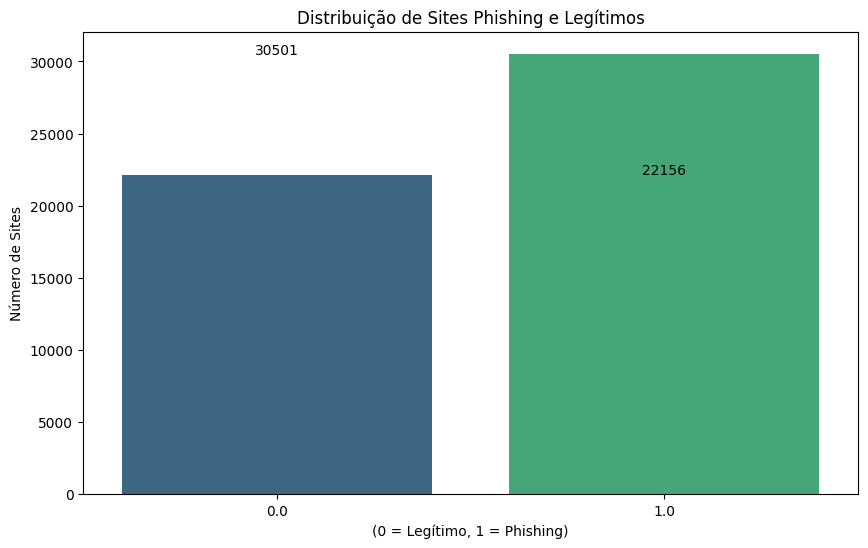

In [431]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Verificar a existência da coluna 'label'
if 'label' not in df.columns:
    raise ValueError("A coluna 'label' não está presente no DataFrame.")

# Contar o número de sites phishing e legítimos
label_counts = df['label'].value_counts().reset_index()
label_counts.columns = ['label', 'count']

# Criar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=label_counts, x='label', y='count', hue='label', palette='viridis', dodge=False, legend=False)

# Adicionar títulos e rótulos
plt.title('Distribuição de Sites Phishing e Legítimos')
plt.xlabel('(0 = Legítimo, 1 = Phishing)')
plt.ylabel('Número de Sites')

# Adicionar rótulos de contagem nas barras
for i in range(len(label_counts)):
    plt.text(x=i, y=label_counts['count'][i] + 0.5, s=label_counts['count'][i], ha='center')

plt.show()


# Valores Únicos das colunas

In [432]:
# Identificar as linhas com valores nulos
linhas_com_nulos = df[df.isnull().any(axis=1)]

# Obter os índices dessas linhas
indices_para_eliminar = linhas_com_nulos.index.tolist()
print("count: ",df.count())

# Imprimir os índices das linhas para eliminar
print("Índices das linhas com valores nulos:", indices_para_eliminar)

# Eliminar as linhas com valores nulos
df = df.drop(index=indices_para_eliminar)

# Verificar o DataFrame limpo
print(df)
print("count: ",df.count())

print("Tipos de dados de cada coluna no dataset:")
print(df.dtypes)

count:  URLLength             52658
DomainLength          52658
IsDomainIP            52658
TLD                   52666
URLSimilarityIndex    52658
                      ...  
Postal                52666
Timezone              52666
Latitude              52666
Longitude             52666
ID                    52666
Length: 62, dtype: int64
Índices das linhas com valores nulos: [0, 212, 401, 458, 506, 629, 939, 1093, 1205]
       URLLength  DomainLength  IsDomainIP  TLD  URLSimilarityIndex  \
1           23.0          16.0         0.0  148          100.000000   
2           29.0          22.0         0.0  426          100.000000   
3           26.0          19.0         0.0  131          100.000000   
4           33.0          26.0         0.0  330          100.000000   
5           30.0          23.0         0.0  330          100.000000   
...          ...           ...         ...  ...                 ...   
52661       28.0          21.0         0.0  131          100.000000   
52662  

# Análise gráfica (boxplot for outliers)

Quartiles and First Outlier for URLLength:
25th percentile: 23.0
50th percentile (Median): 27.0
75th percentile: 34.0
First outlier value: 51.0

Quartiles and First Outlier for DomainLength:
25th percentile: 16.0
50th percentile (Median): 20.0
75th percentile: 24.0
First outlier value: 37.0

Quartiles and First Outlier for URLSimilarityIndex:
25th percentile: 58.22222222
50th percentile (Median): 100.0
75th percentile: 100.0
First outlier value: No outliers

Quartiles and First Outlier for CharContinuationRate:
25th percentile: 0.6875
50th percentile (Median): 1.0
75th percentile: 1.0
First outlier value: 0.0

Quartiles and First Outlier for TLDLegitimateProb:
25th percentile: 0.0064109
50th percentile (Median): 0.0799628
75th percentile: 0.5229071
First outlier value: No outliers

Quartiles and First Outlier for URLCharProb:
25th percentile: 0.050996502
50th percentile (Median): 0.058097493
75th percentile: 0.062973215
First outlier value: 0.001223339

Quartiles and First Outlier for 

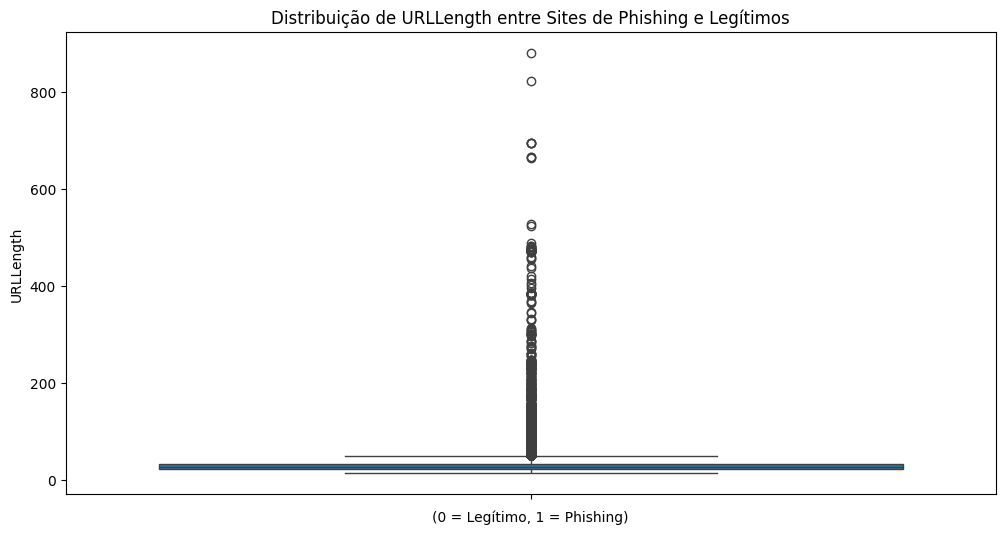

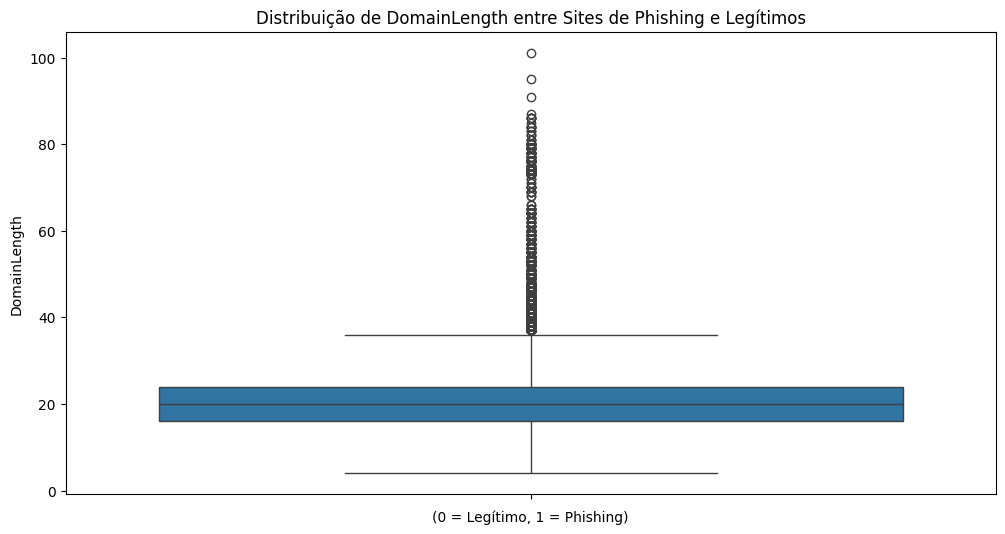

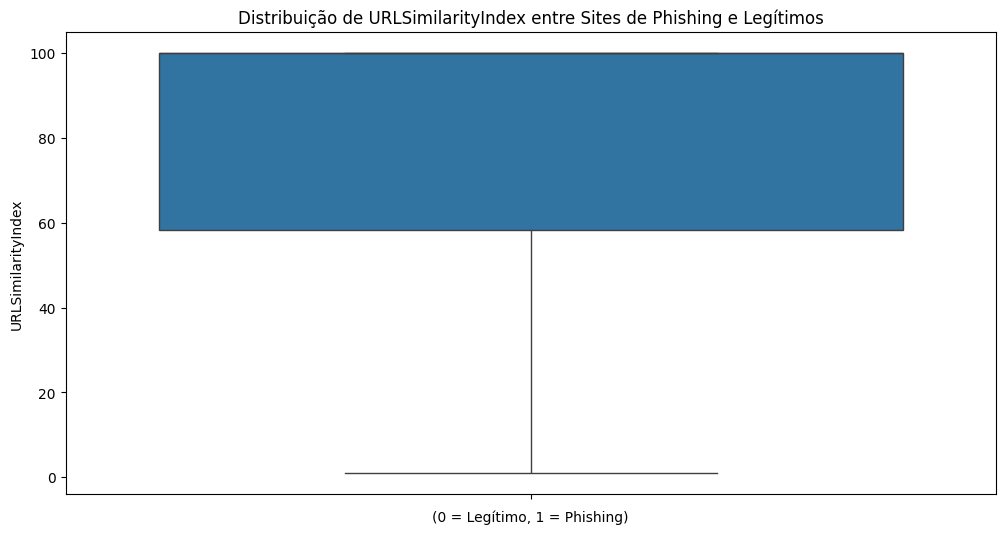

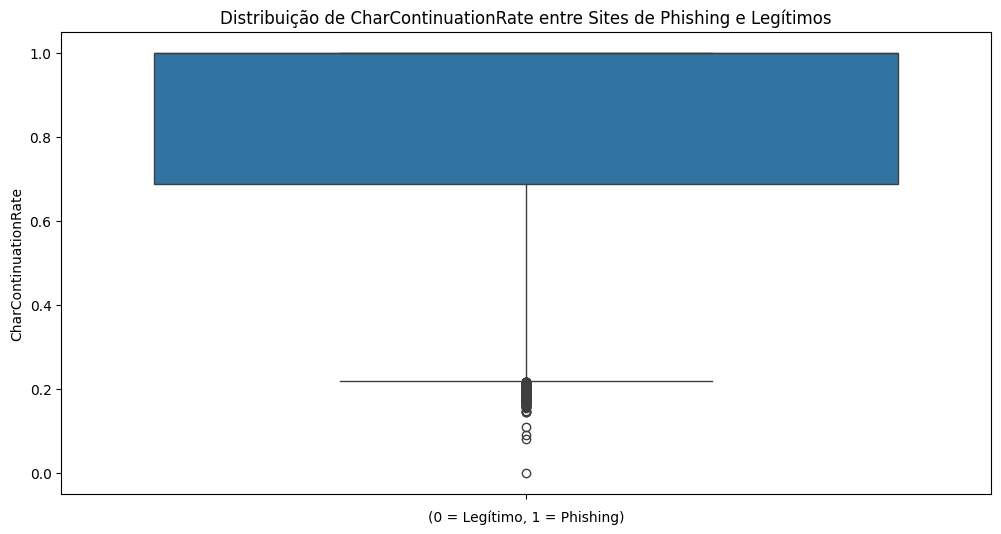

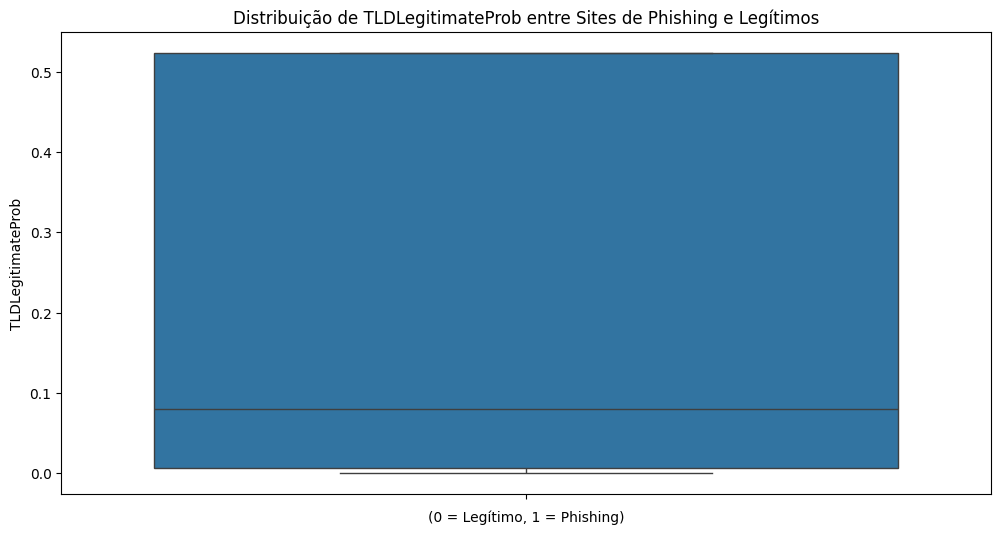

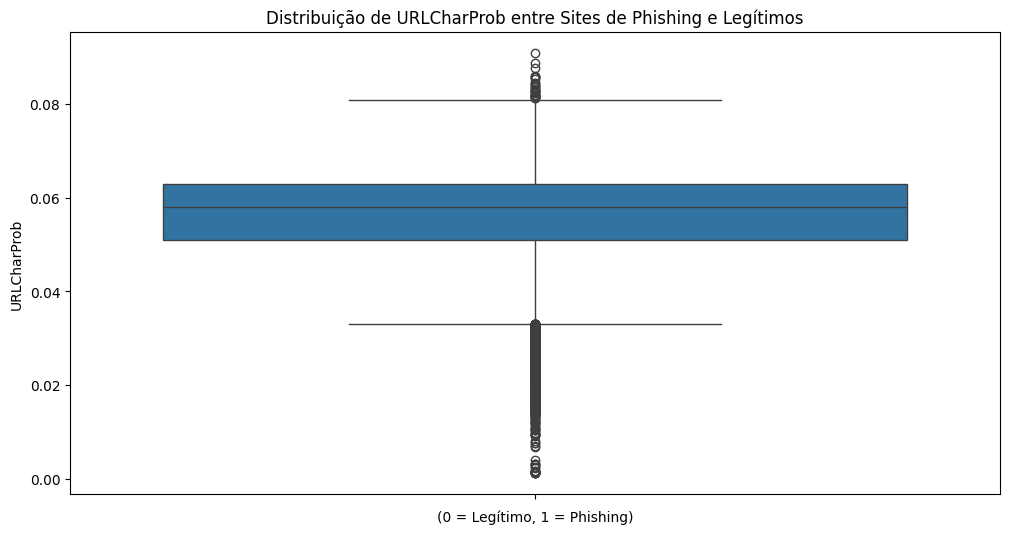

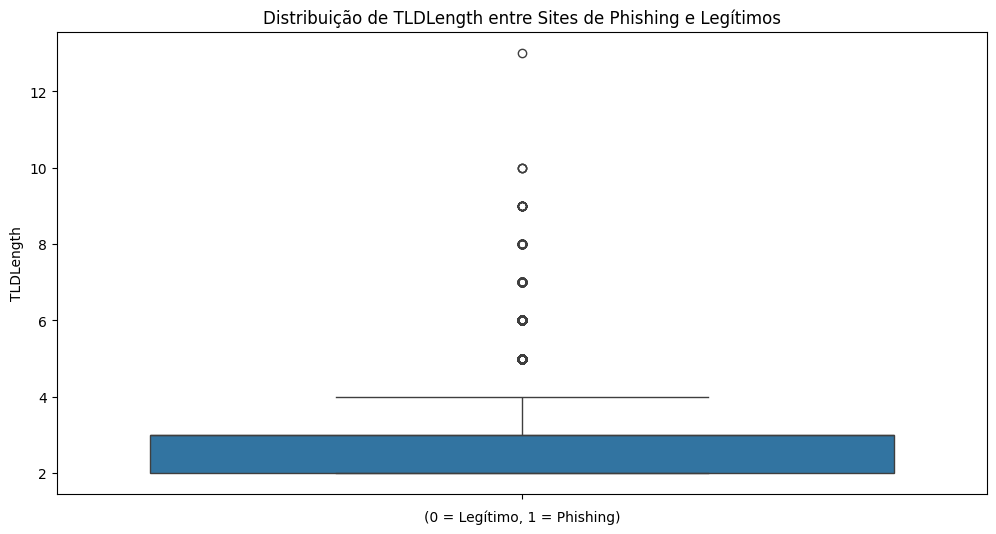

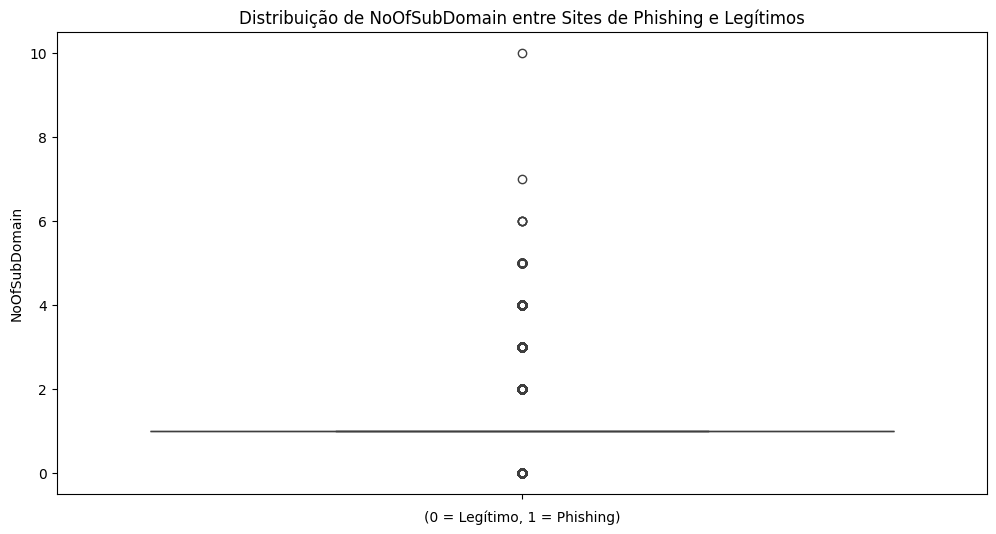

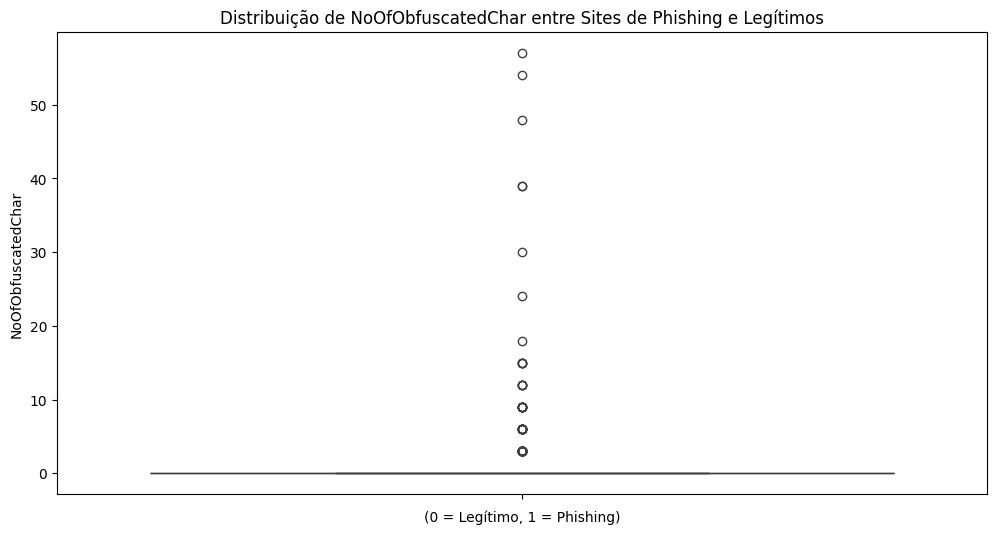

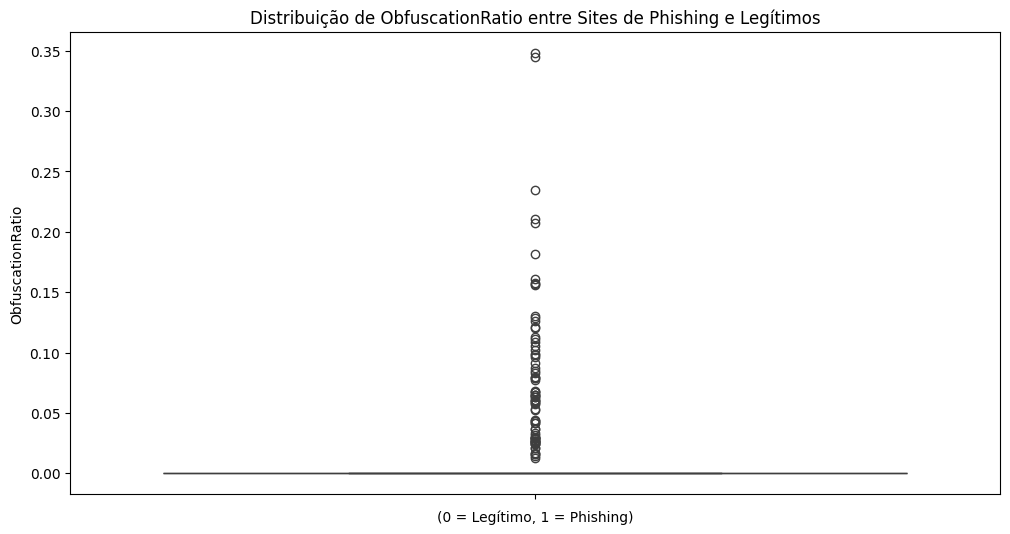

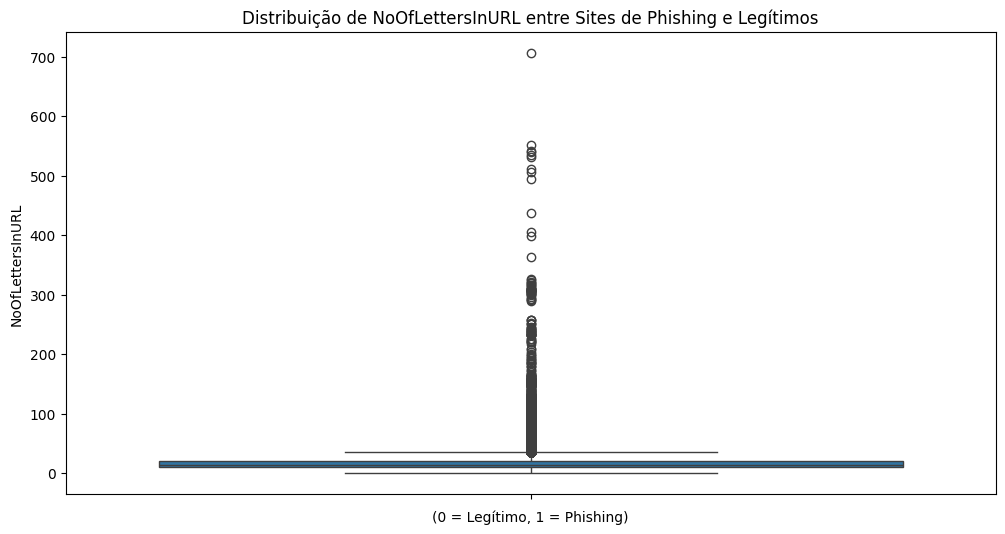

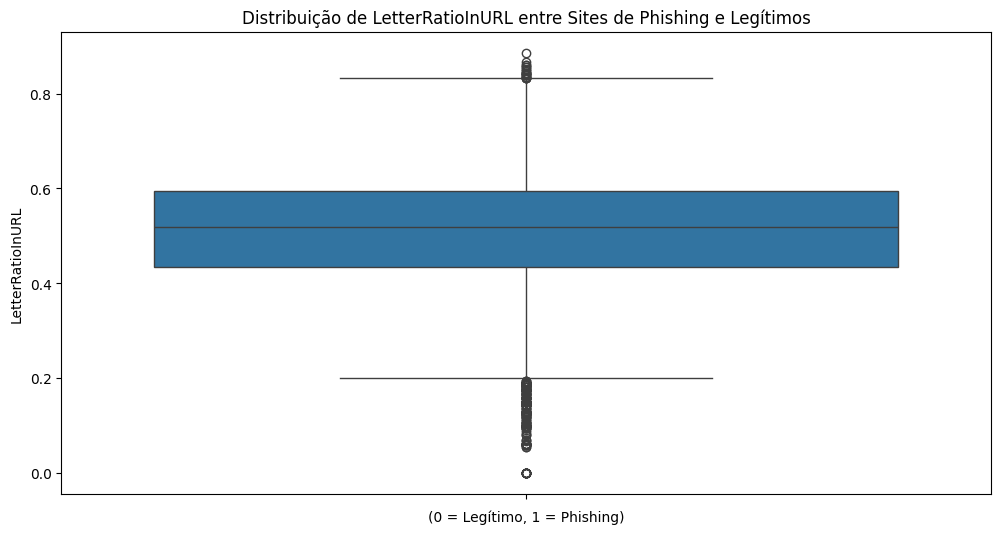

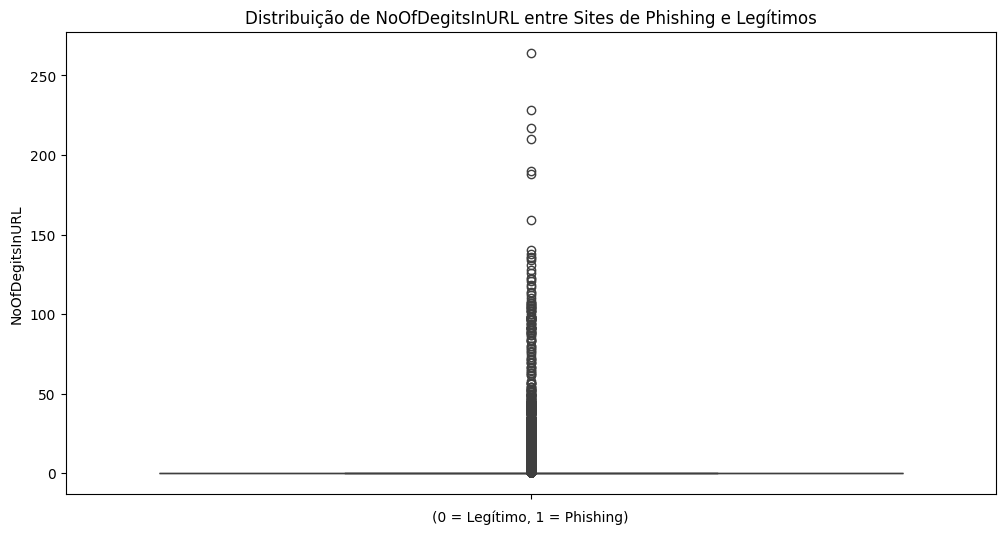

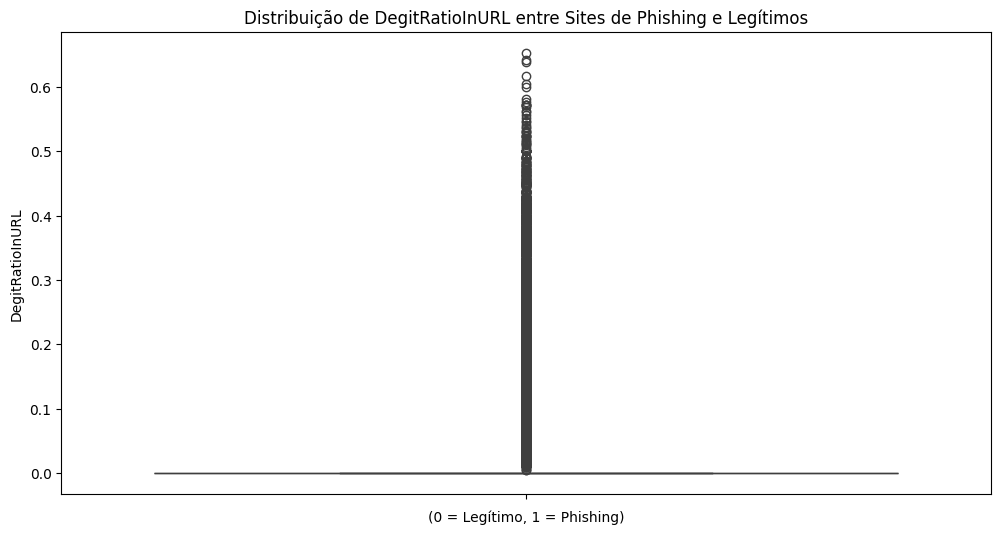

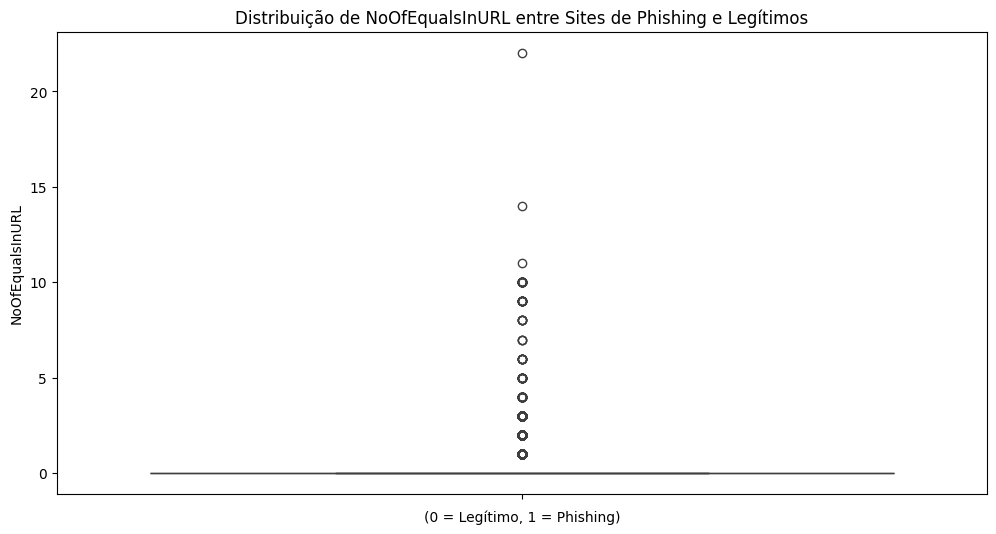

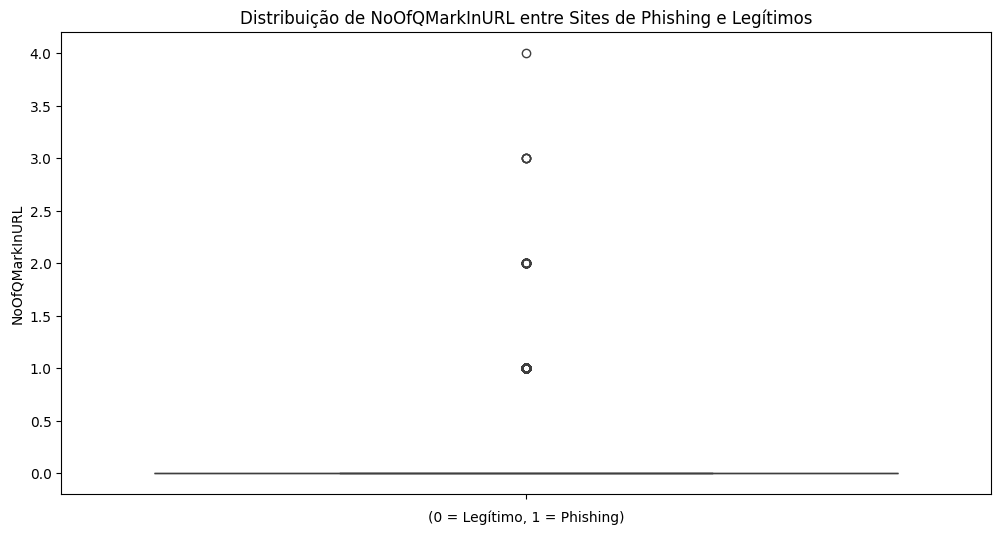

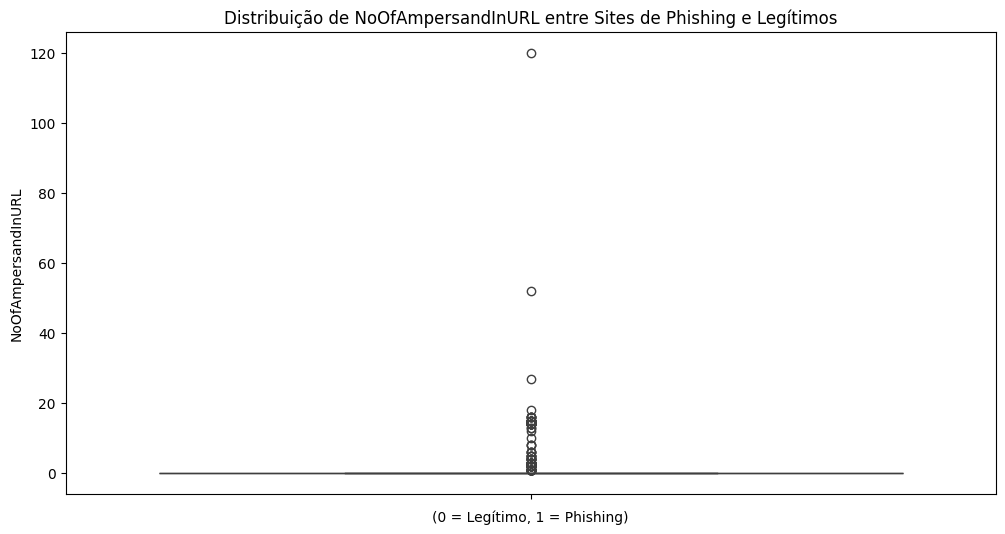

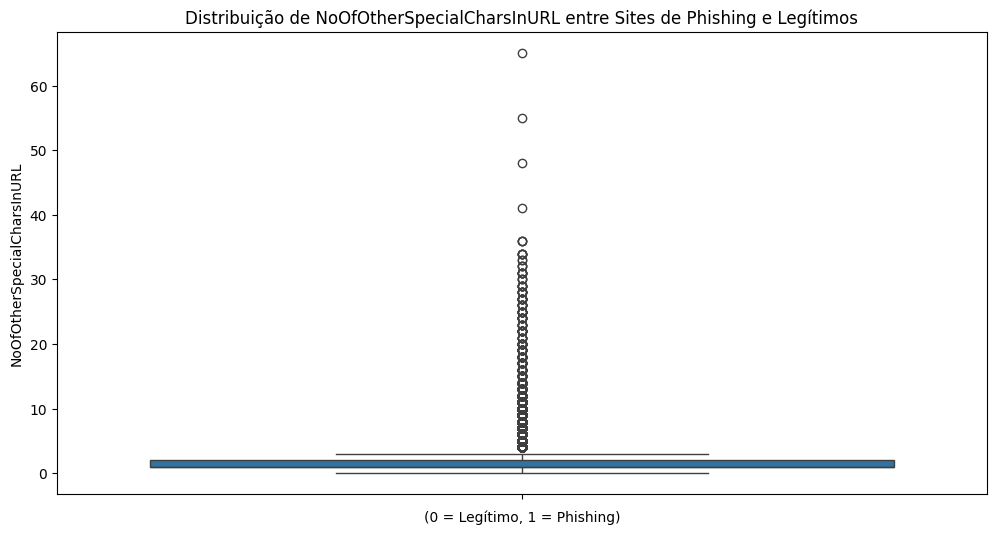

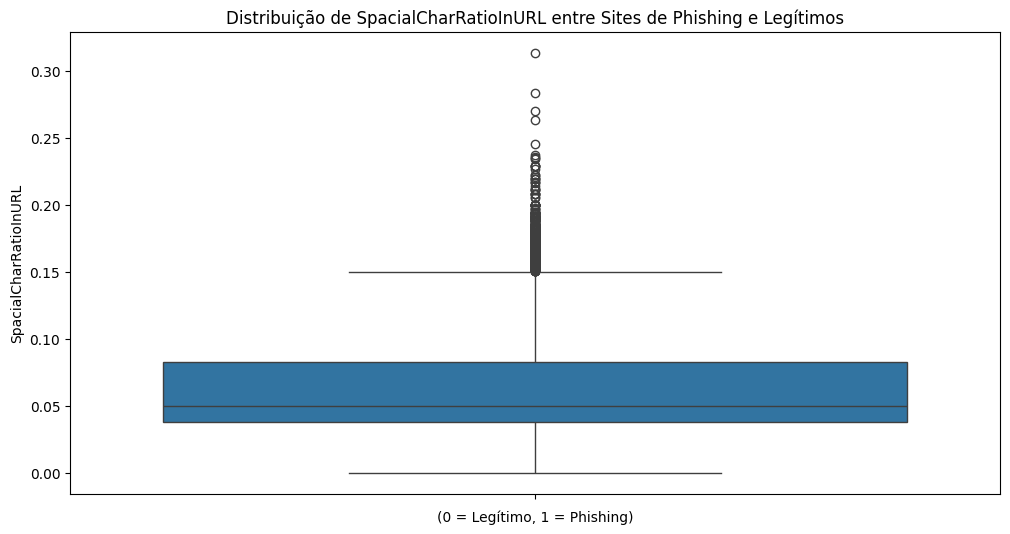

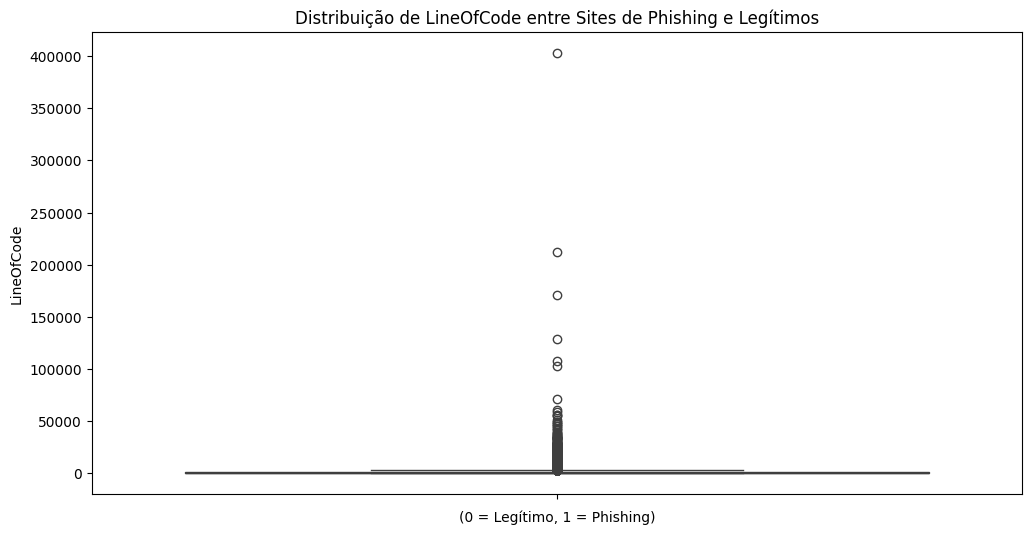

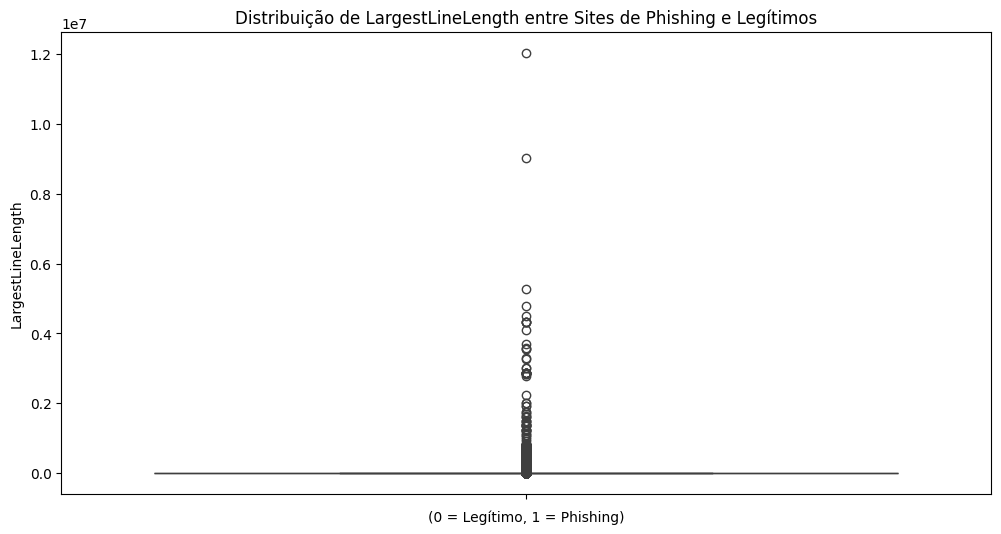

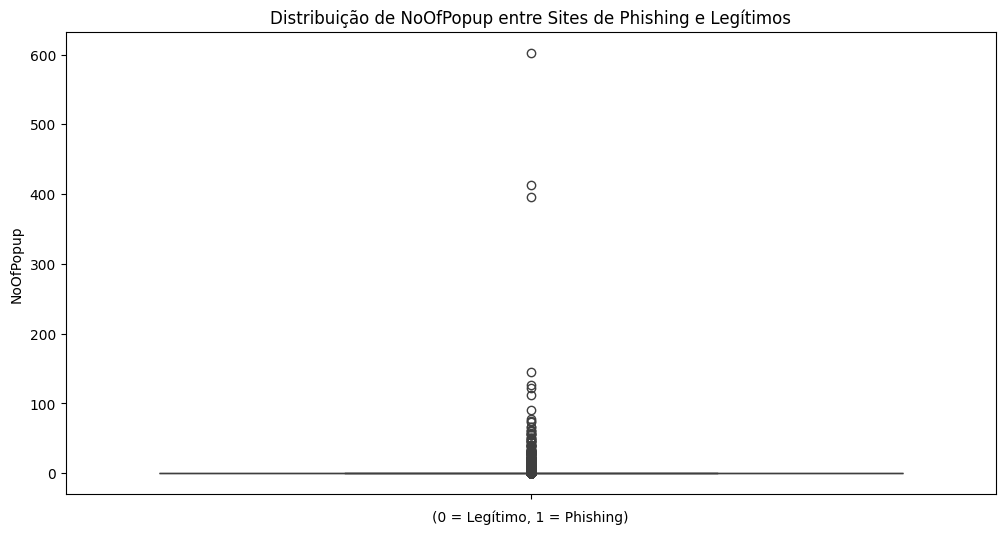

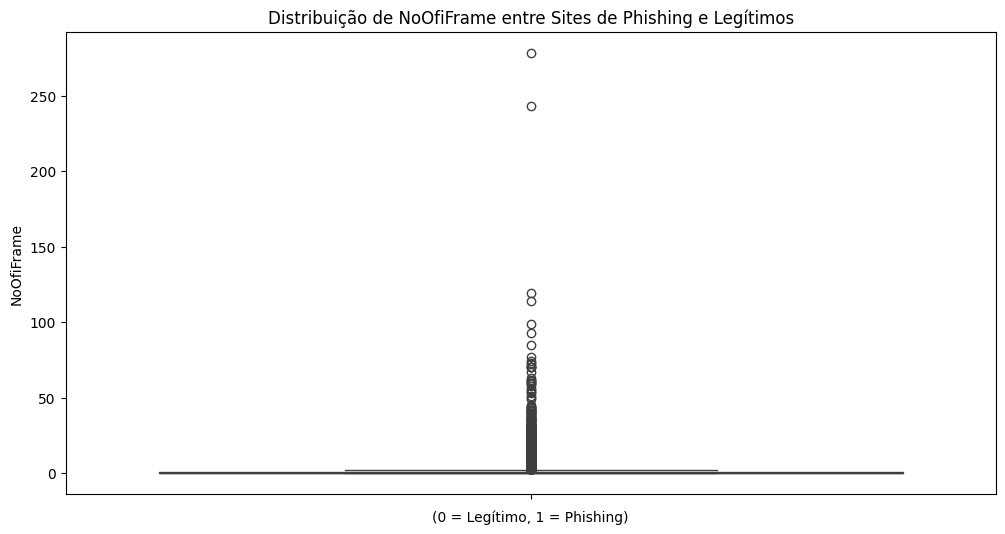

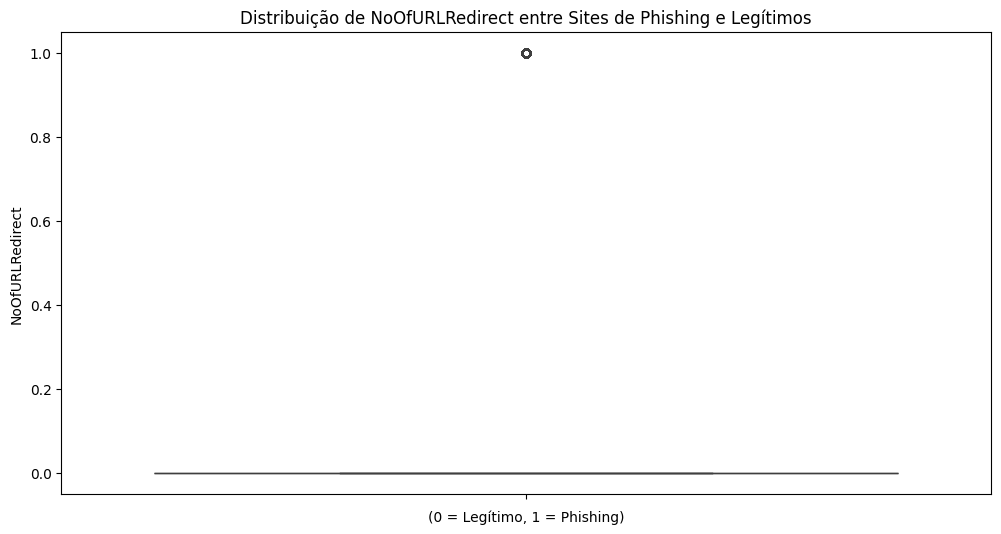

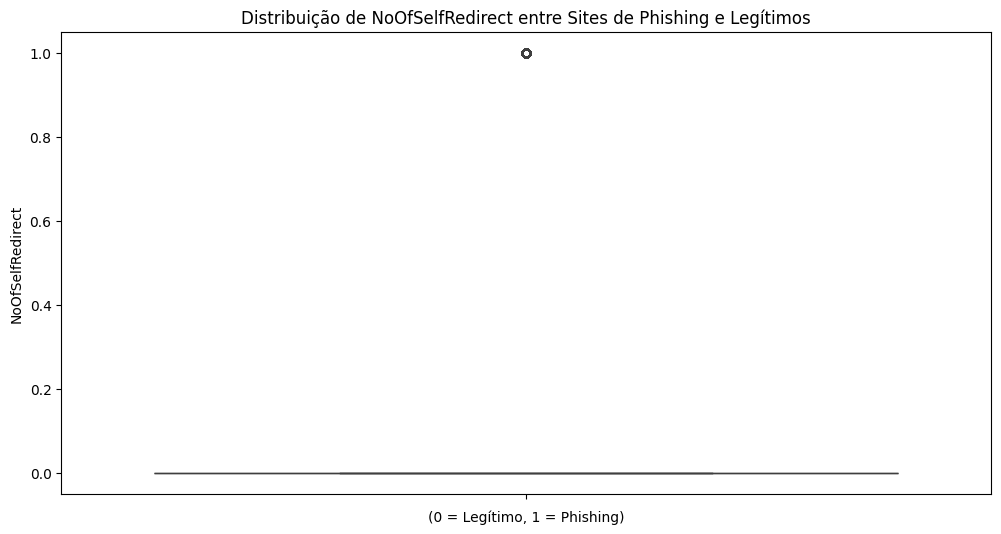

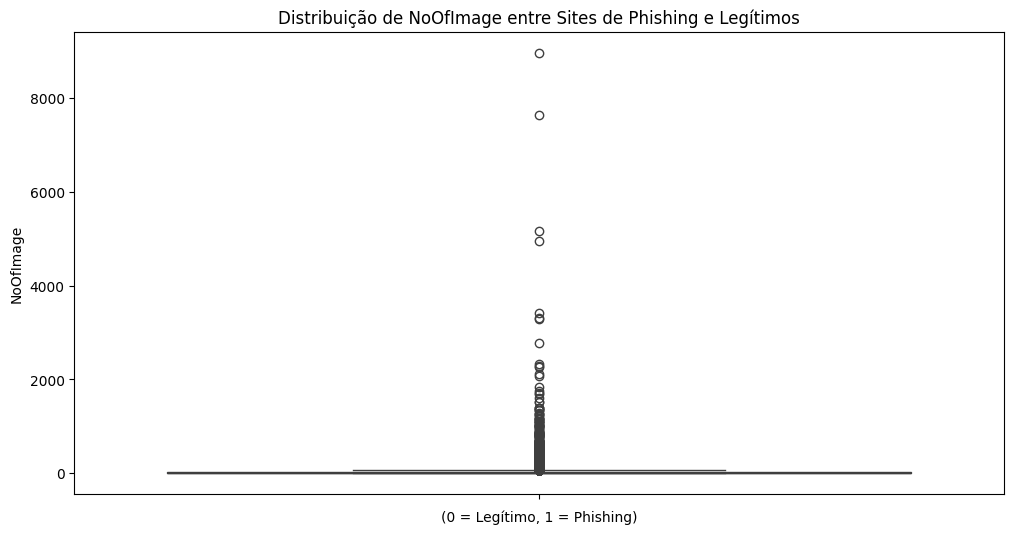

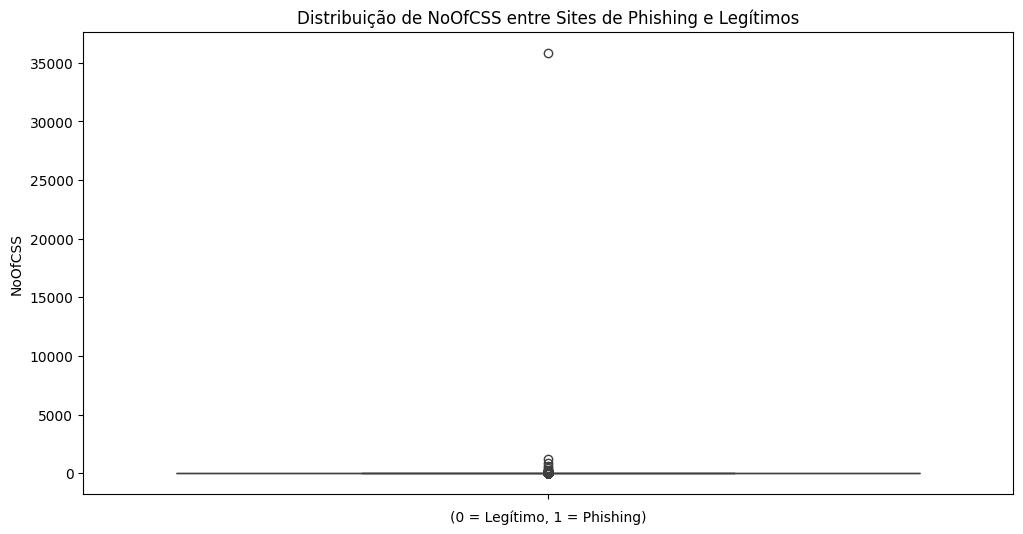

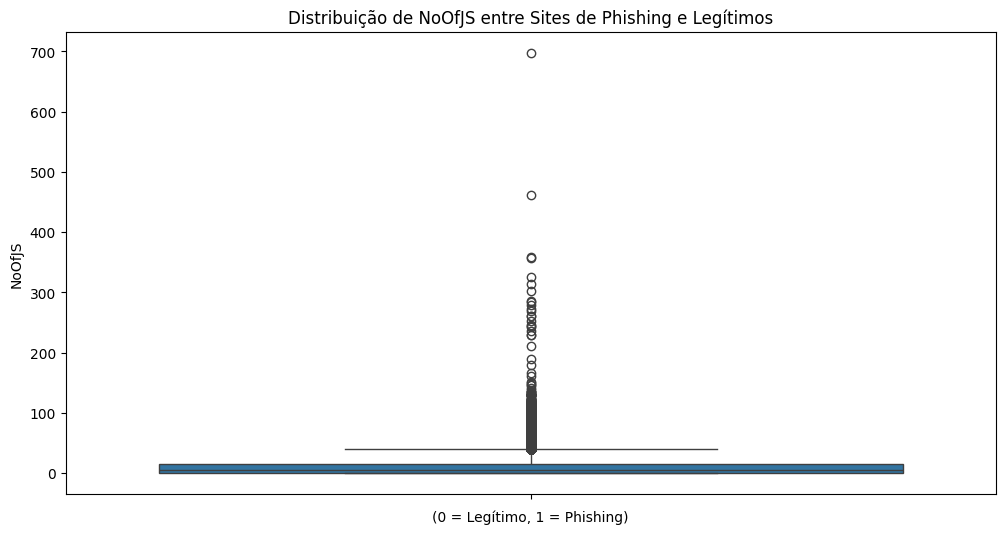

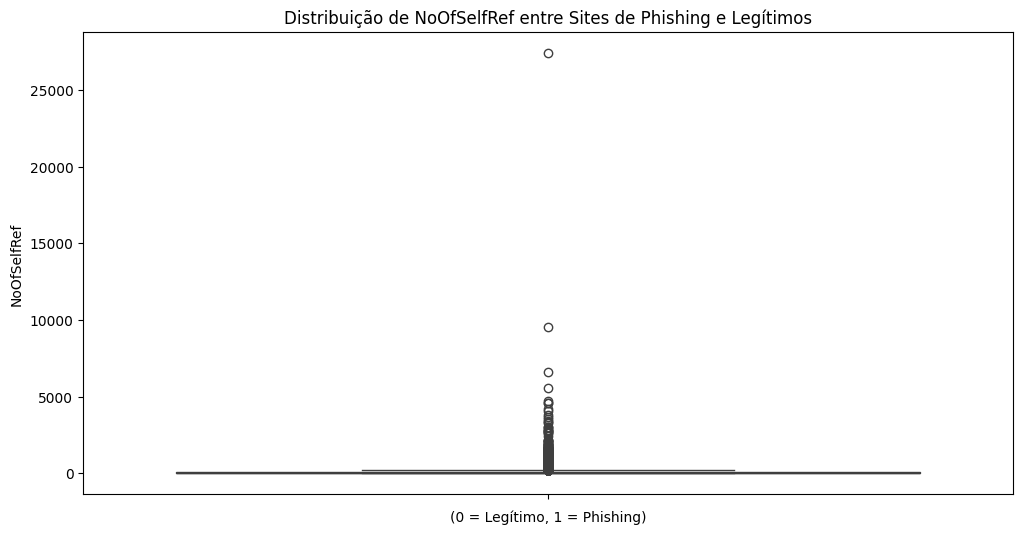

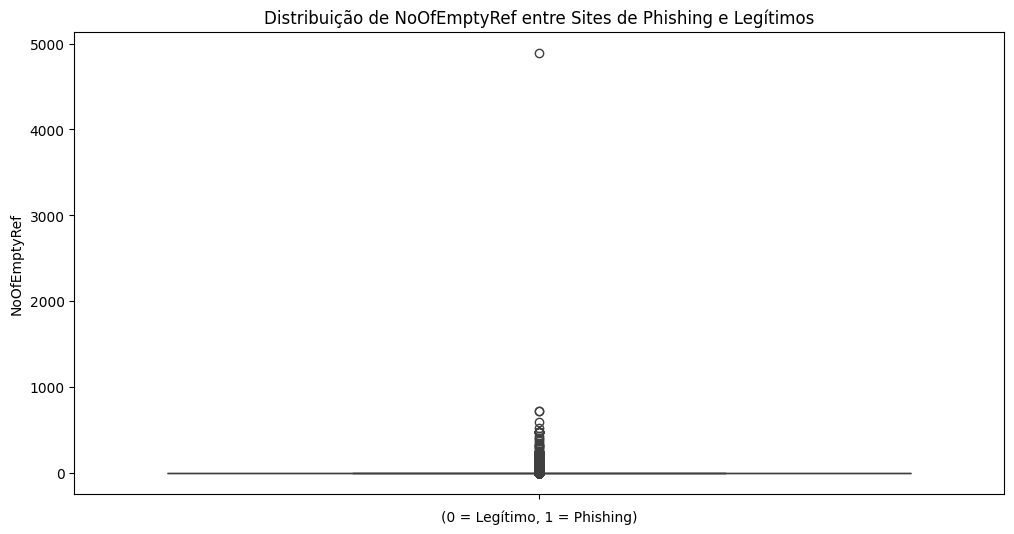

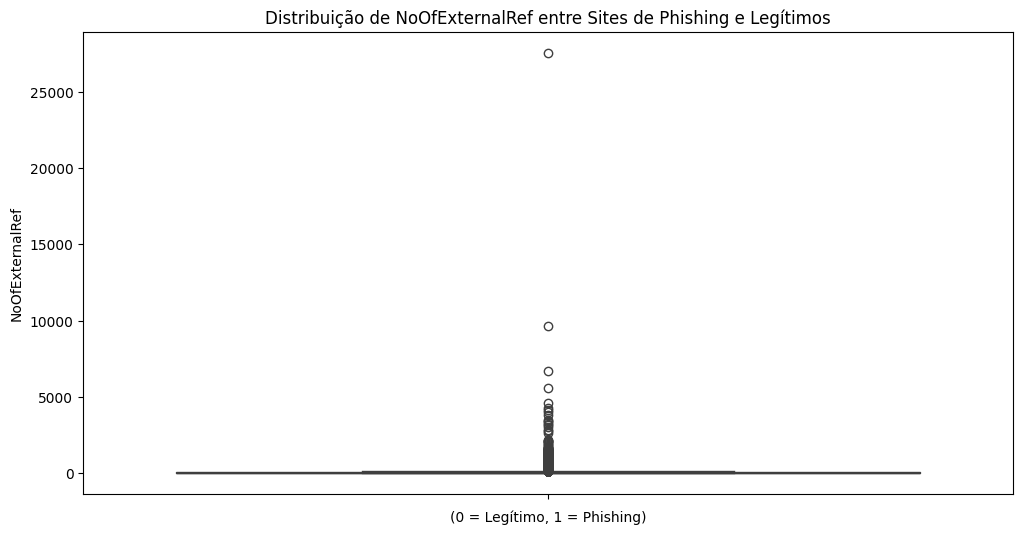

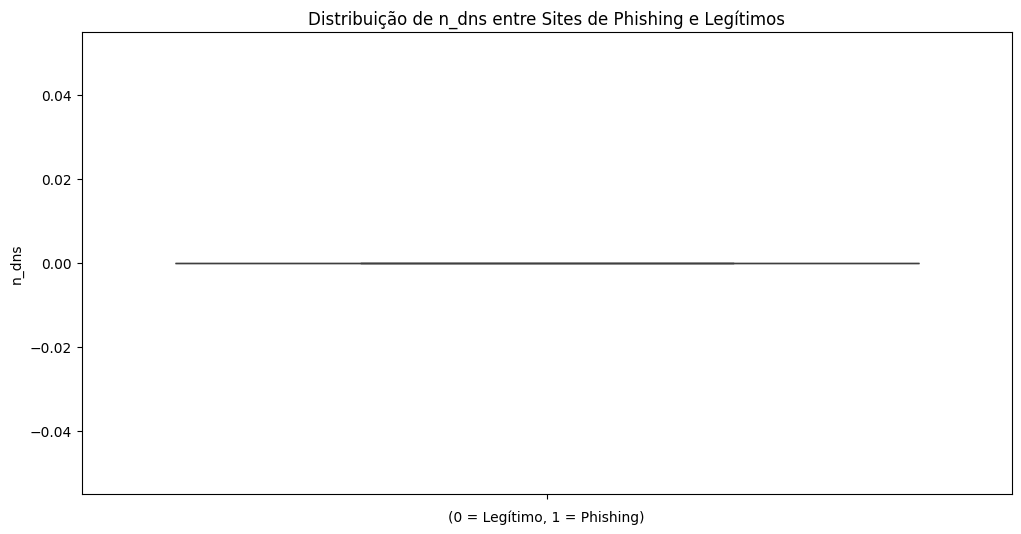

In [433]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Analyze the quartiles and first outlier values
for column in numeric_columns:
    if column in df.columns:
        # Calculate quartiles
        quartiles = df[column].describe()[['25%', '50%', '75%']]
        Q1 = quartiles['25%']
        Q2 = quartiles['50%']
        Q3 = quartiles['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Identify outliers
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
        first_outlier = outliers.min() if not outliers.empty else 'No outliers'
        
        print(f'Quartiles and First Outlier for {column}:')
        print(f"25th percentile: {Q1}")
        print(f"50th percentile (Median): {Q2}")
        print(f"75th percentile: {Q3}")
        print(f"First outlier value: {first_outlier}")
        print()

# Plot the boxplots for each numeric column
for column in numeric_columns:
    if column in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(y=column, data=df)
        plt.title(f'Distribuição de {column} entre Sites de Phishing e Legítimos')
        plt.xlabel('(0 = Legítimo, 1 = Phishing)')
        plt.ylabel(column)
        plt.show()





# Análise gráfica (boxplot com divisão se foi ataque ou não)

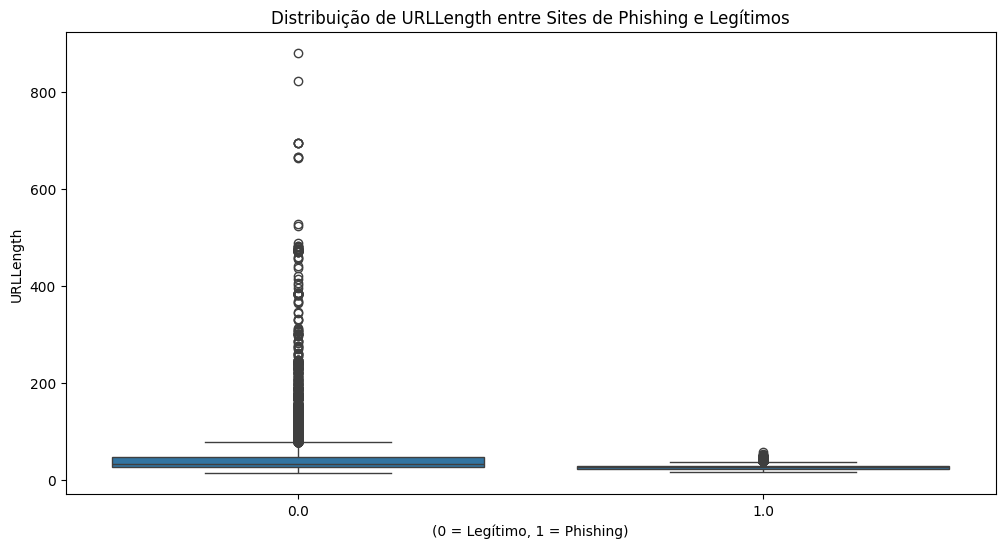

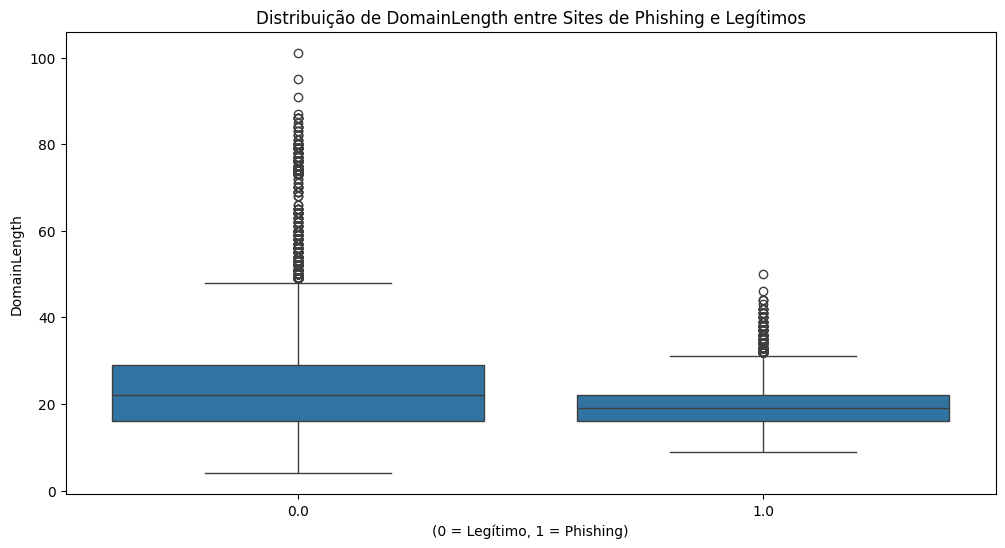

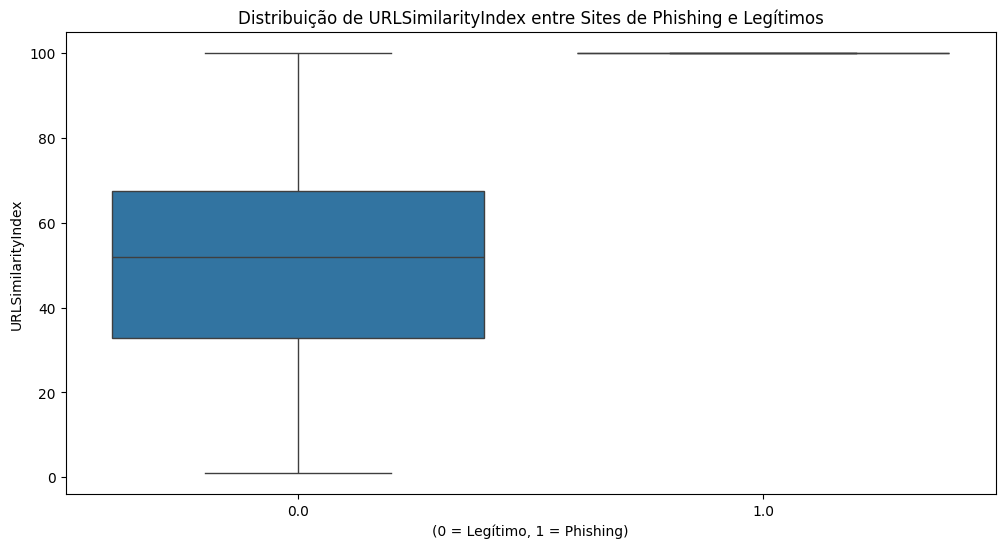

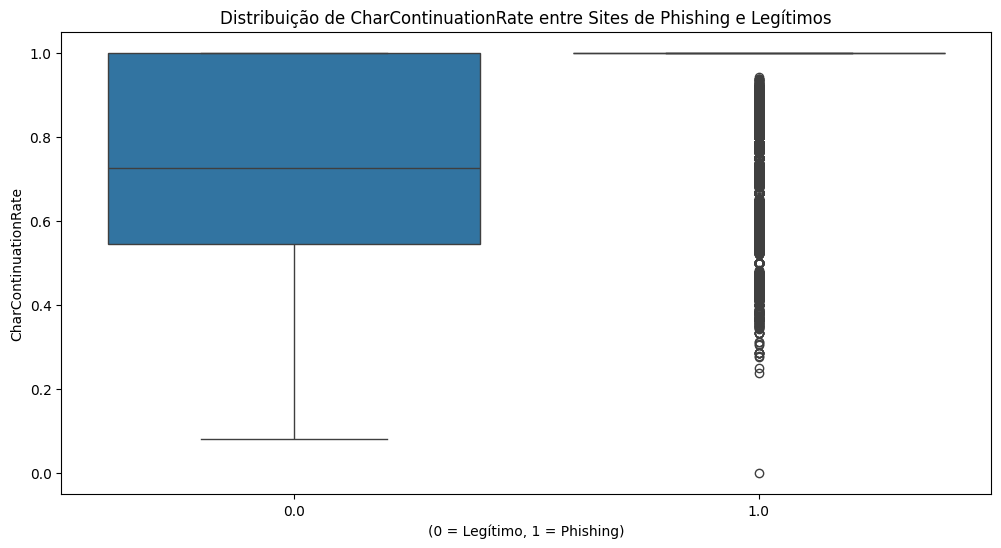

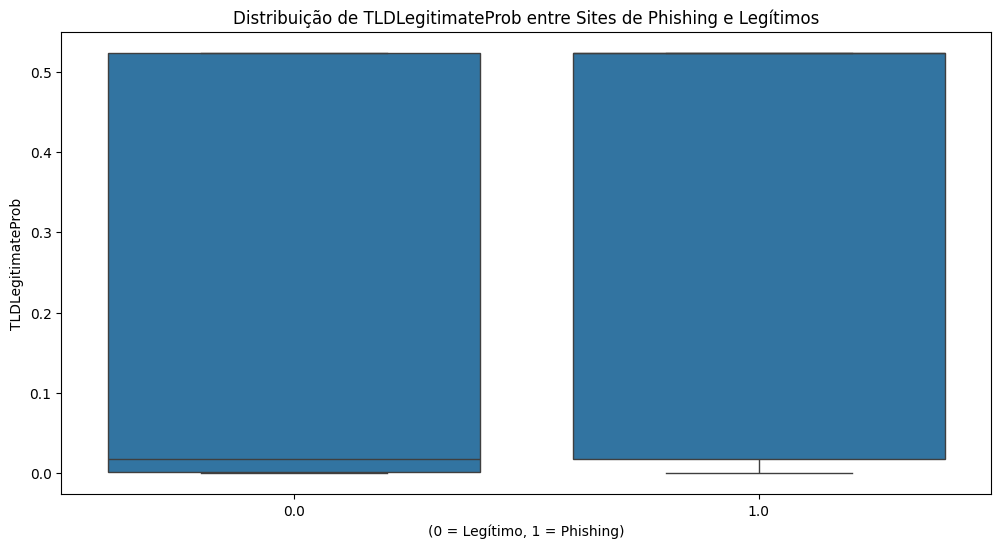

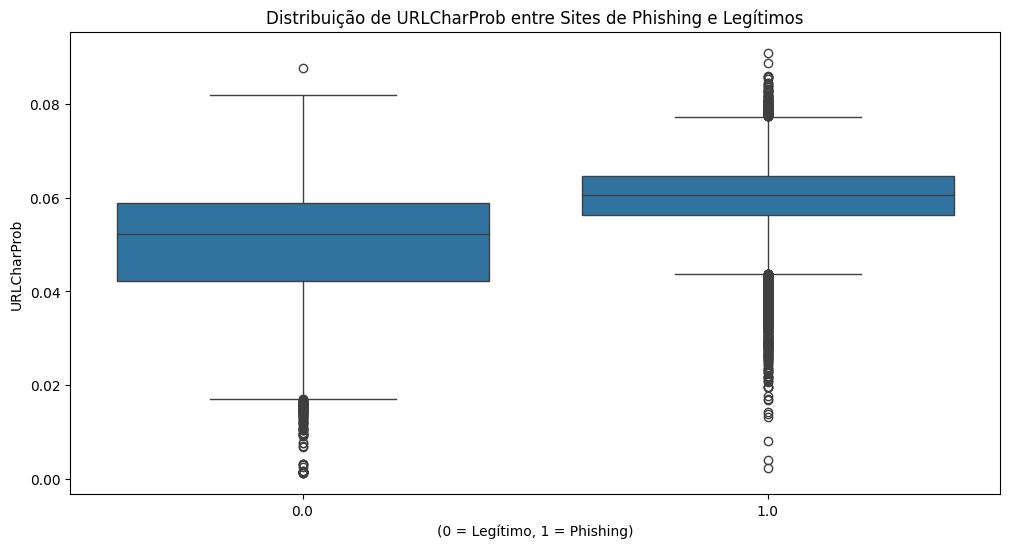

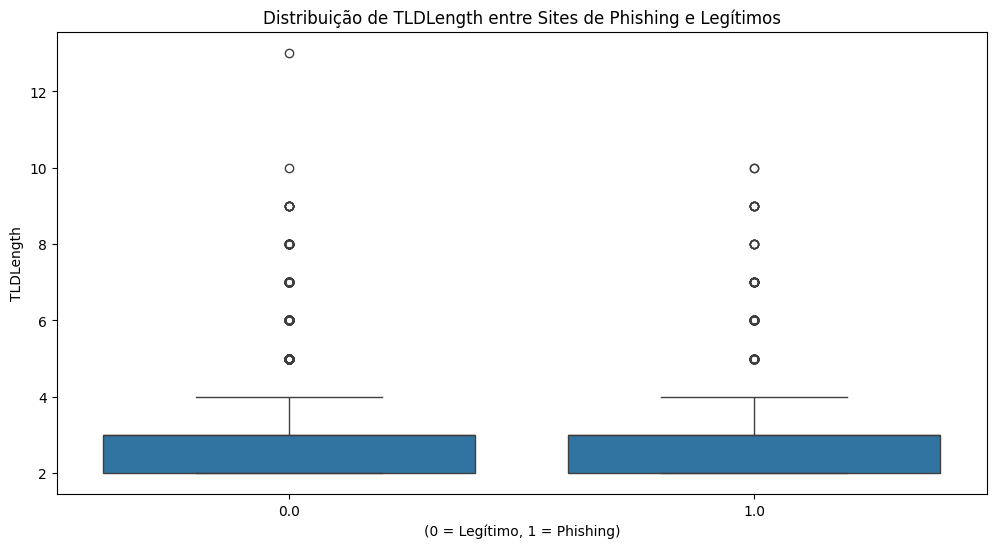

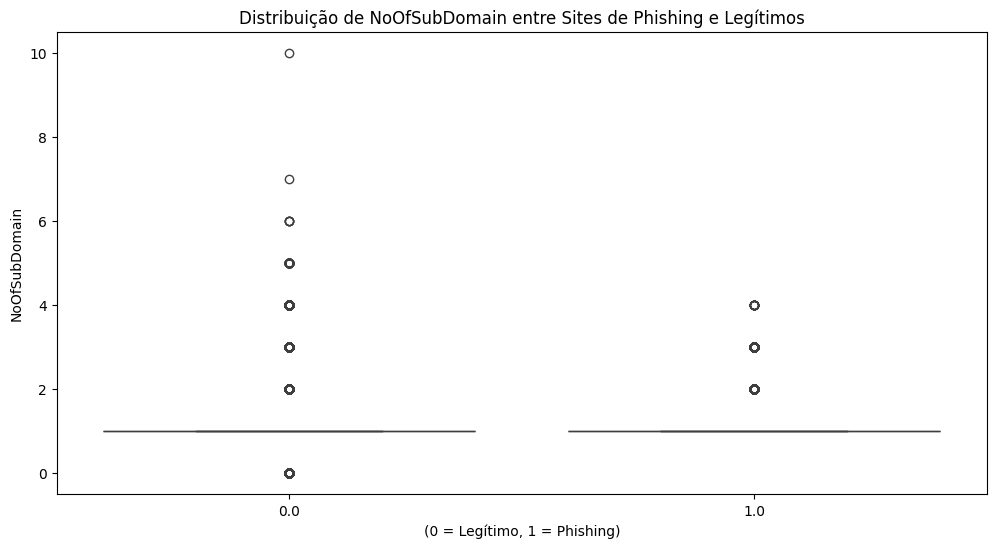

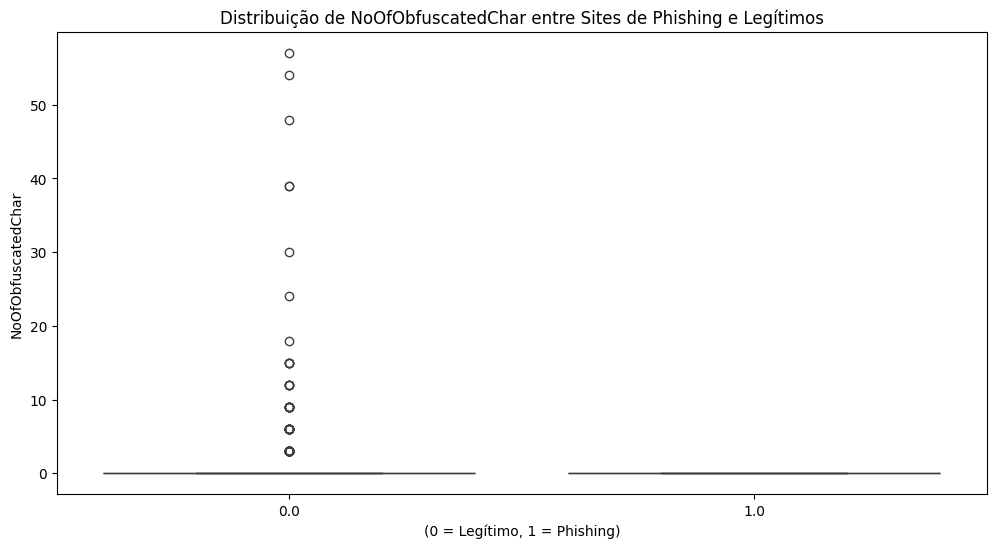

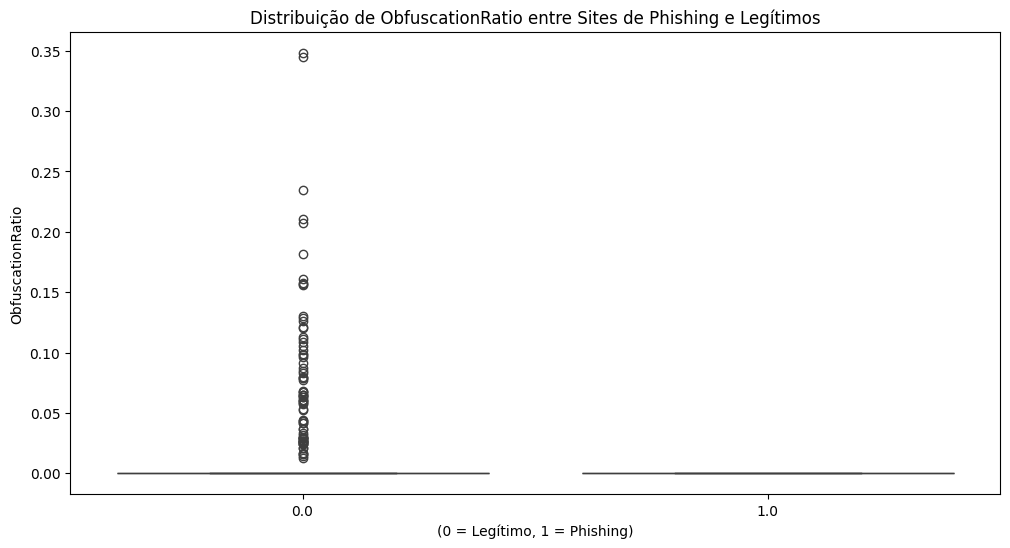

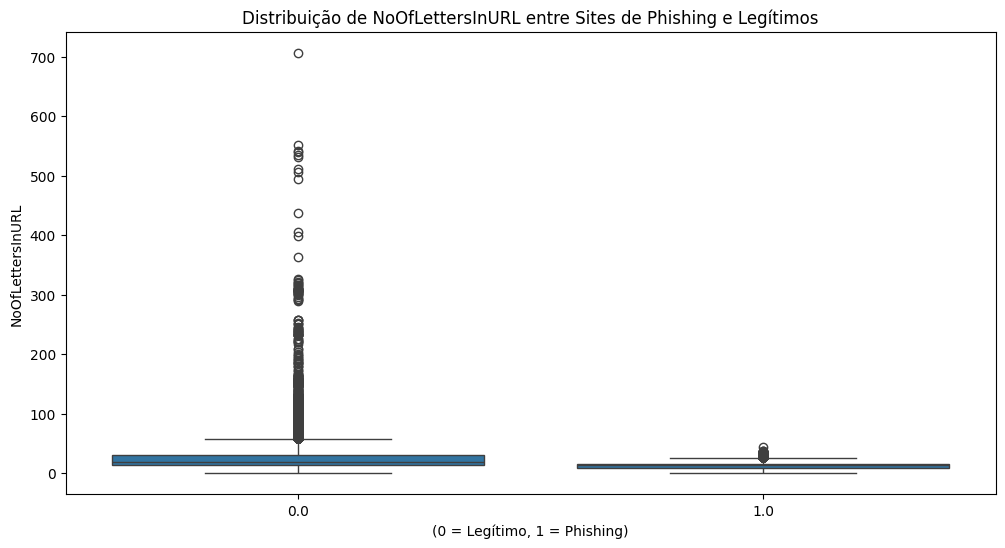

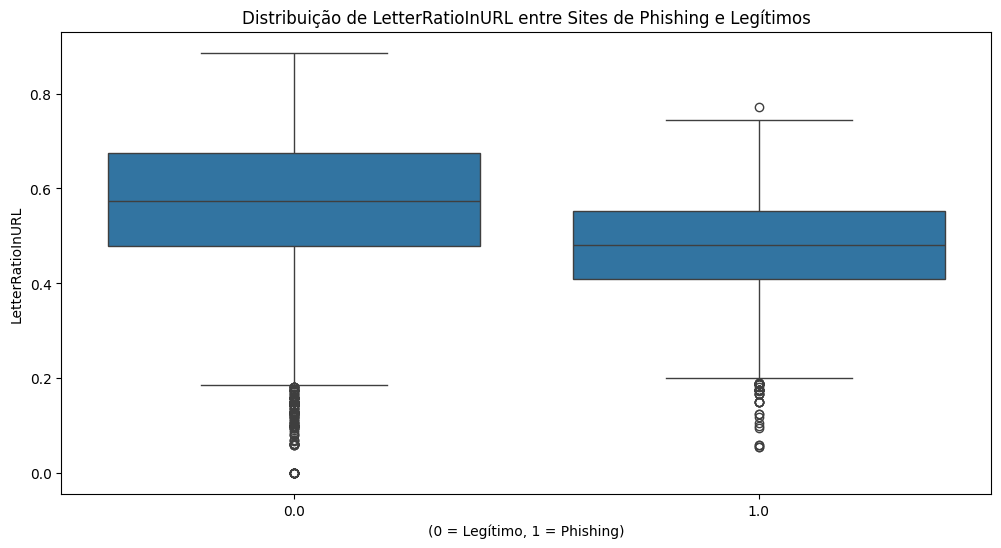

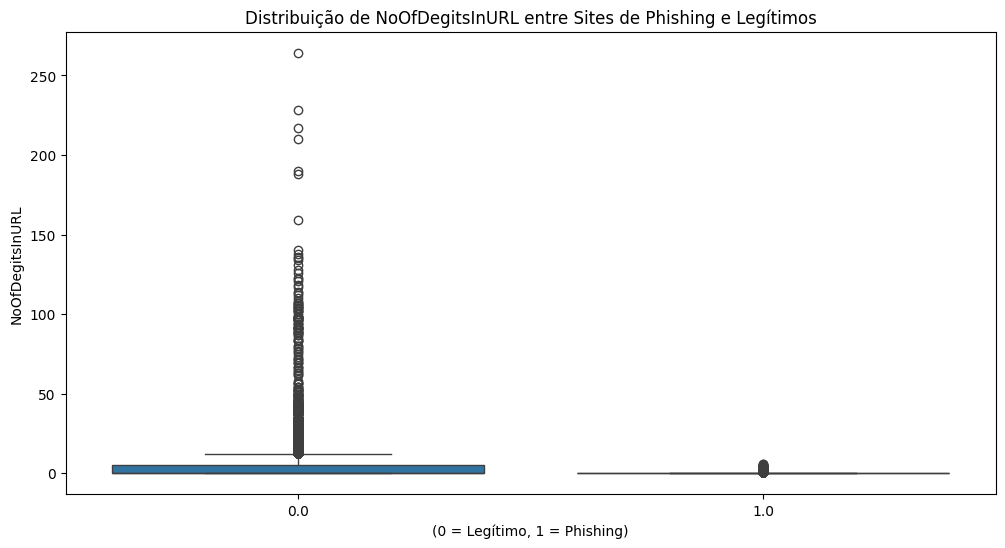

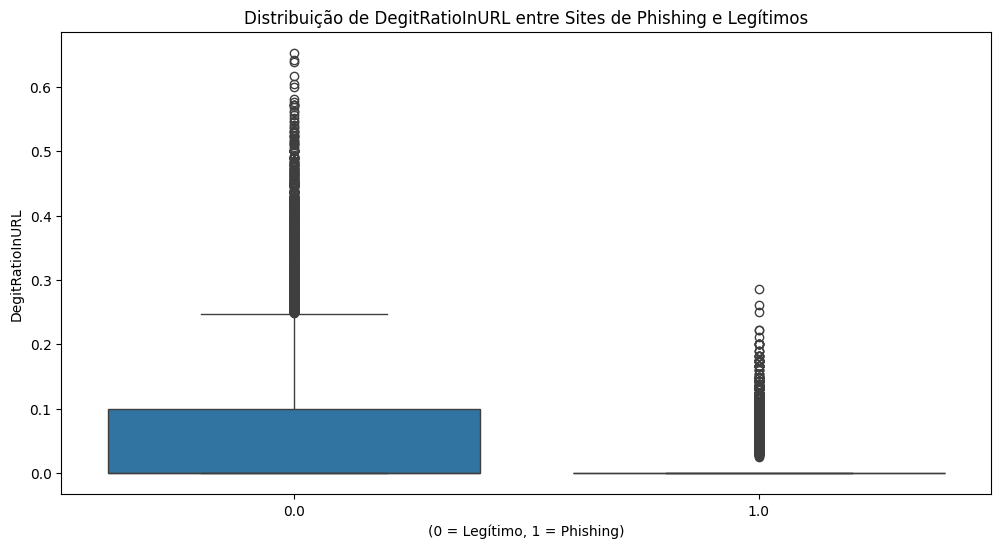

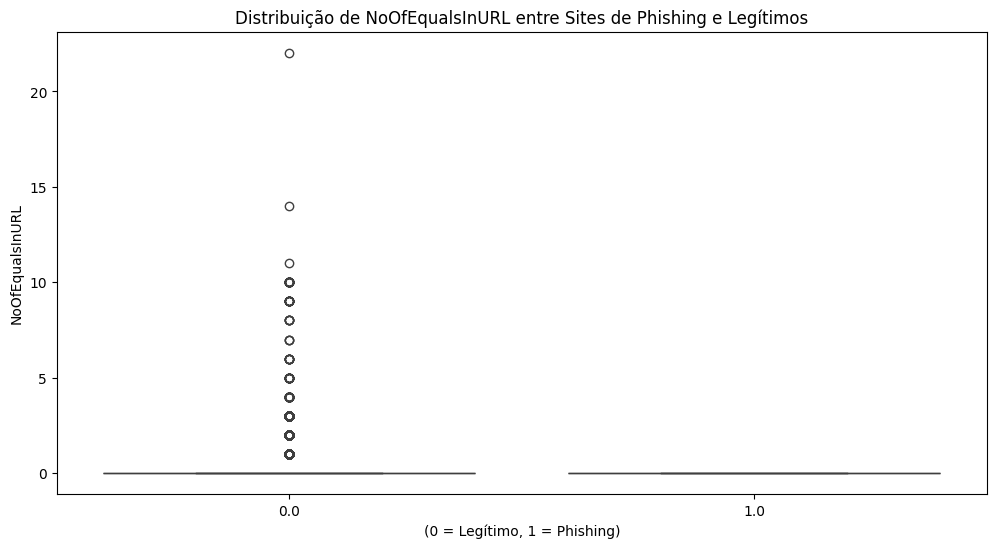

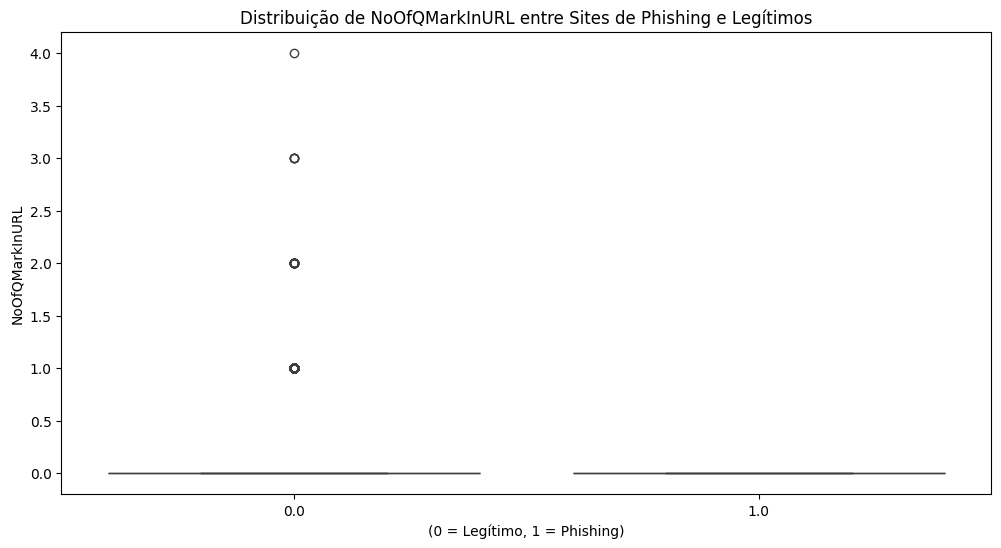

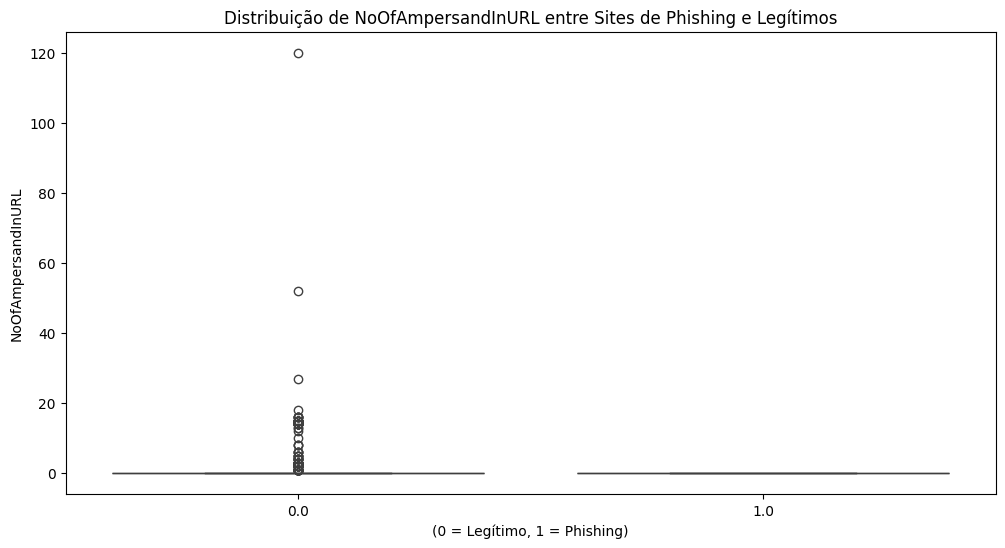

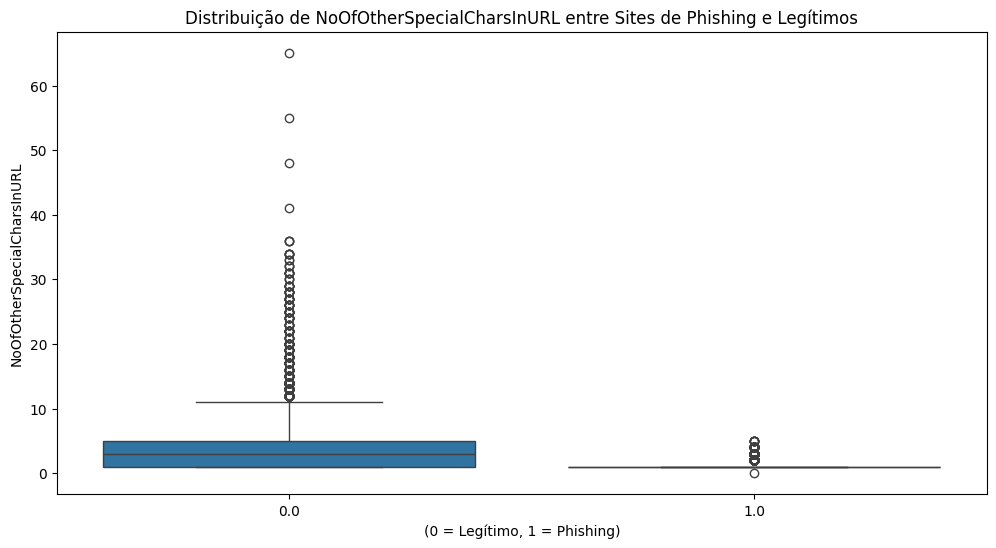

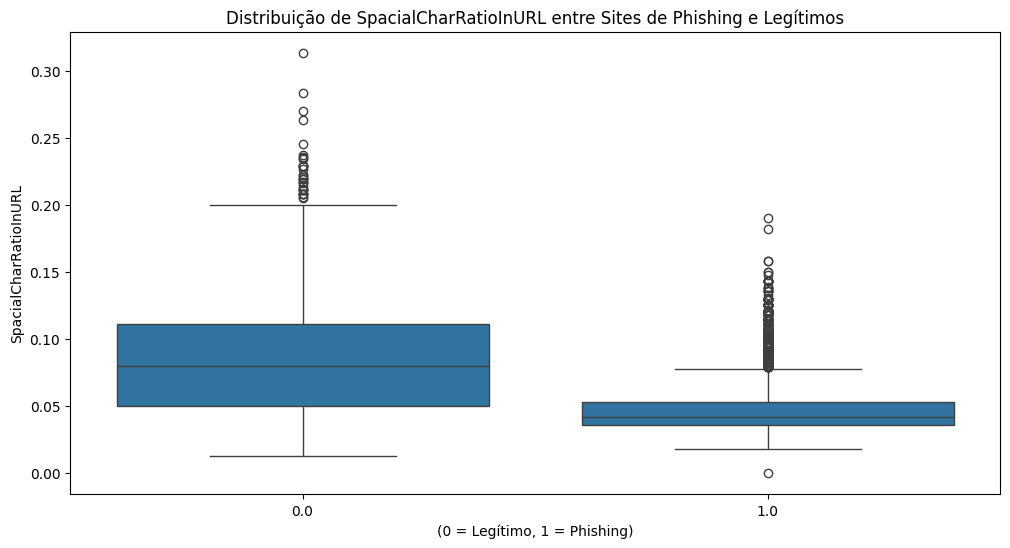

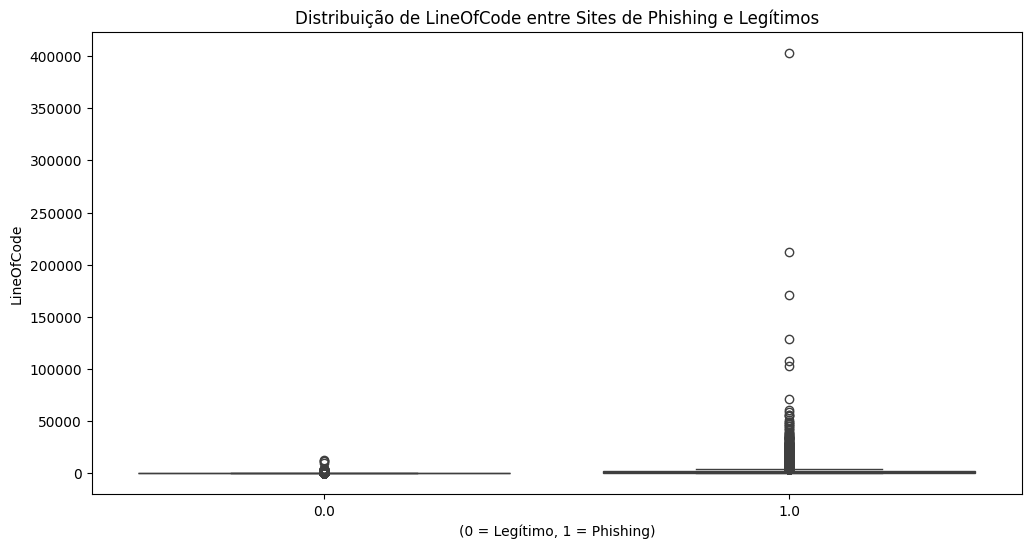

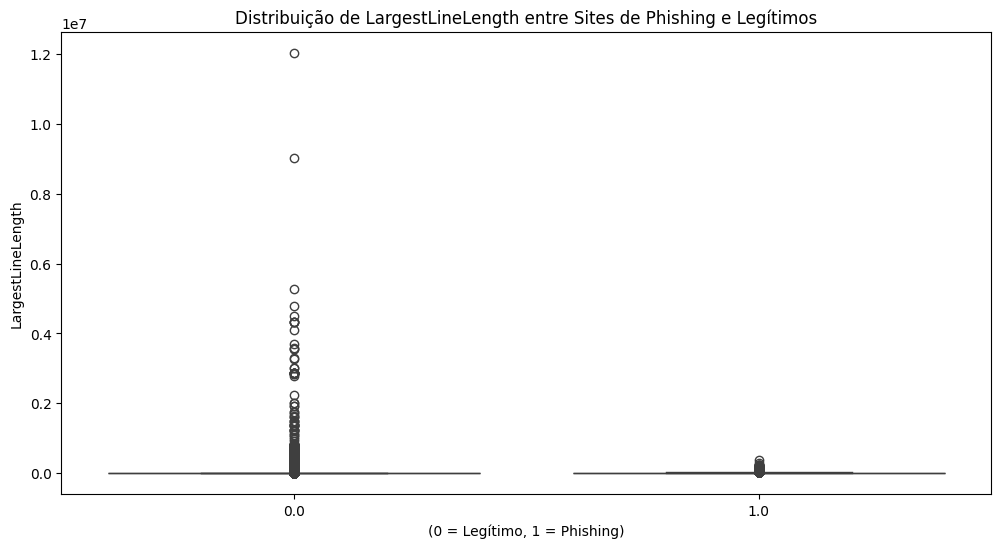

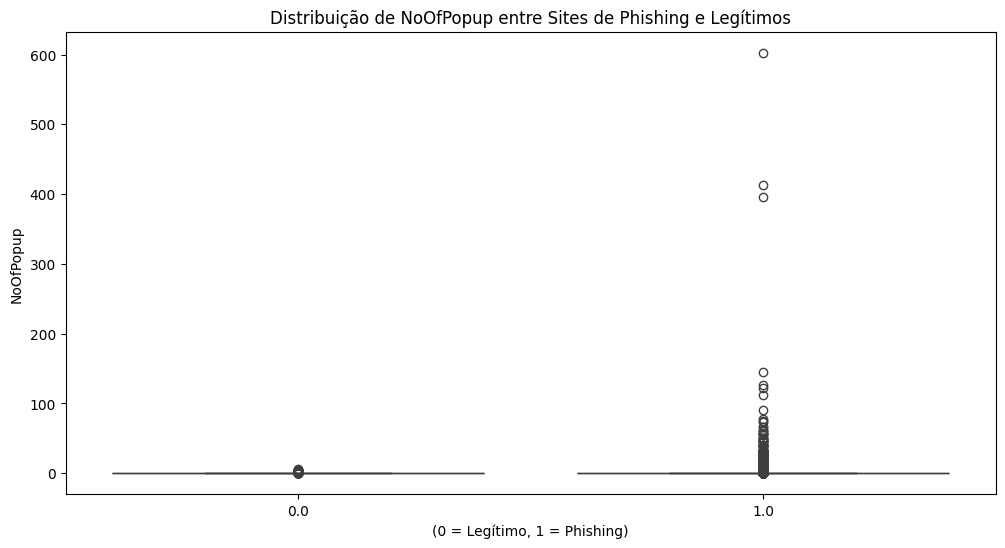

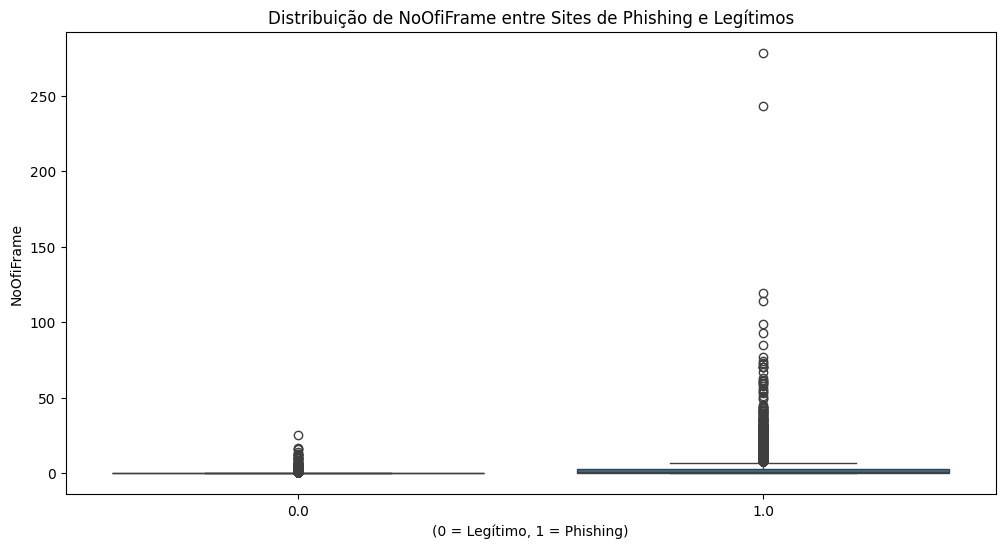

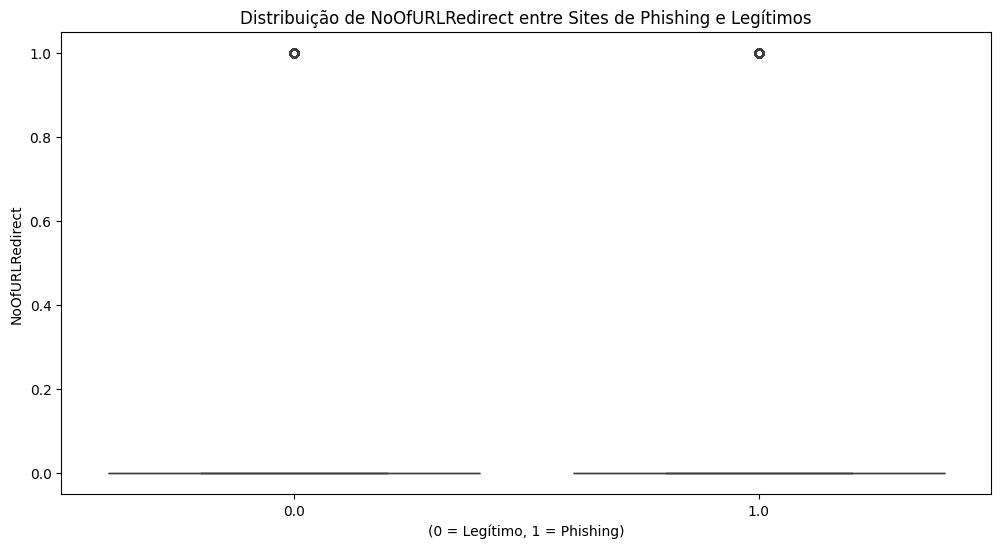

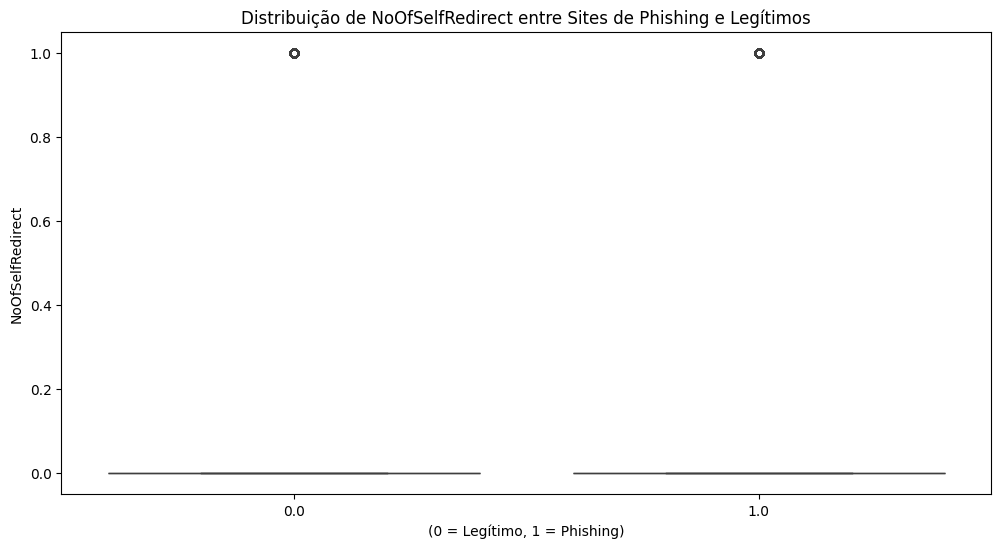

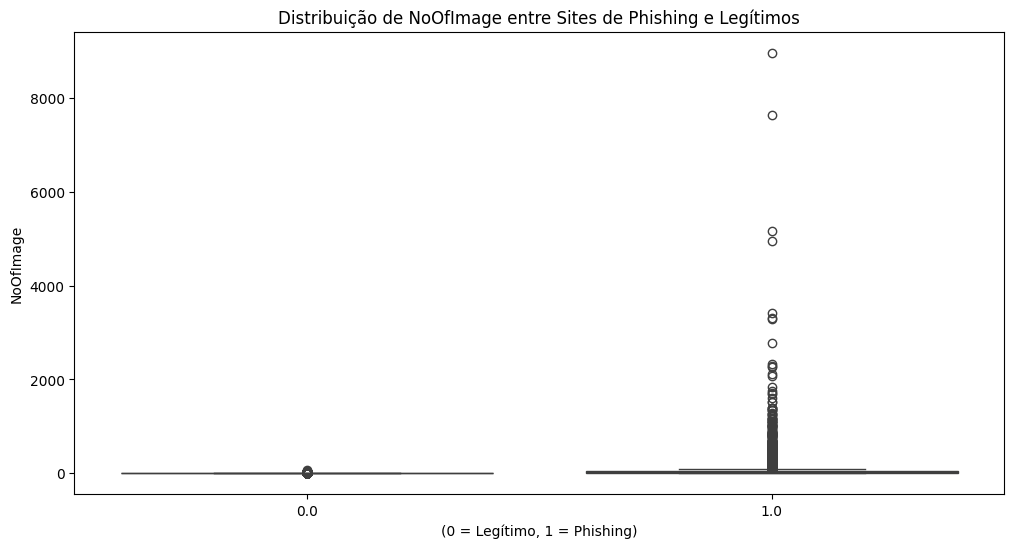

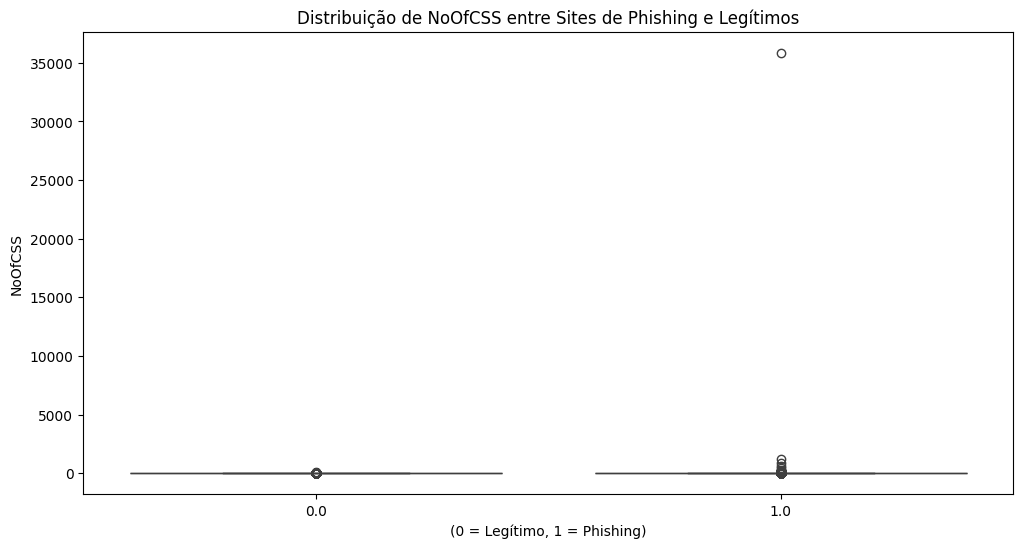

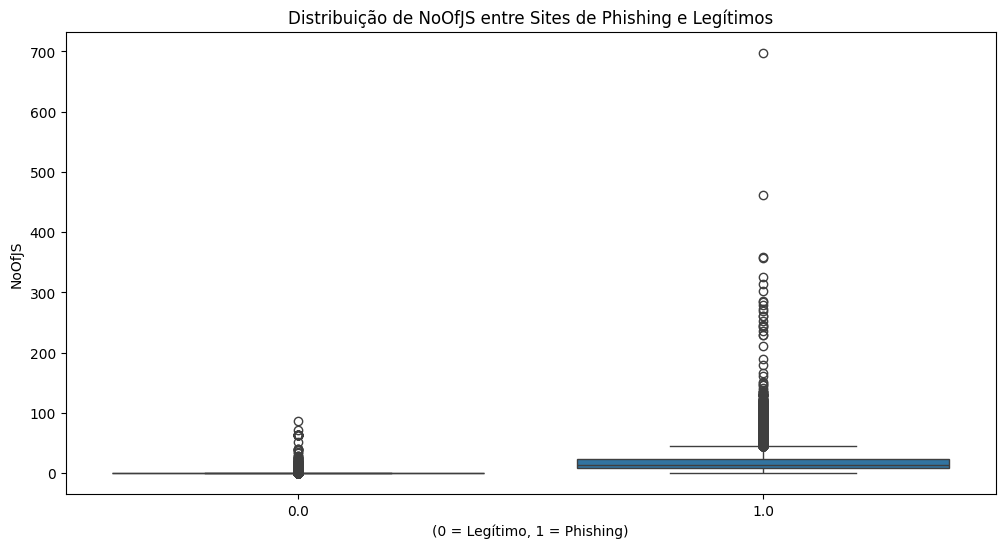

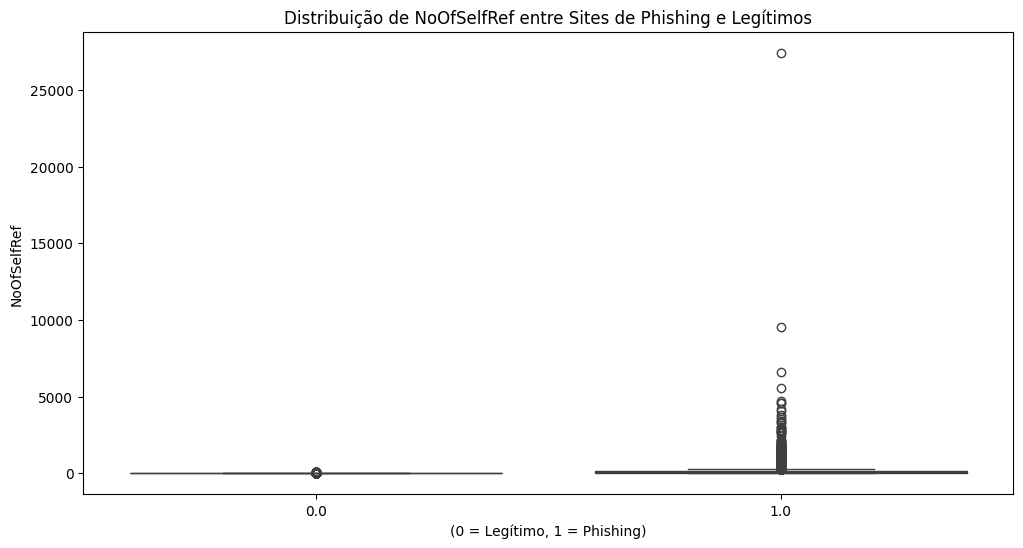

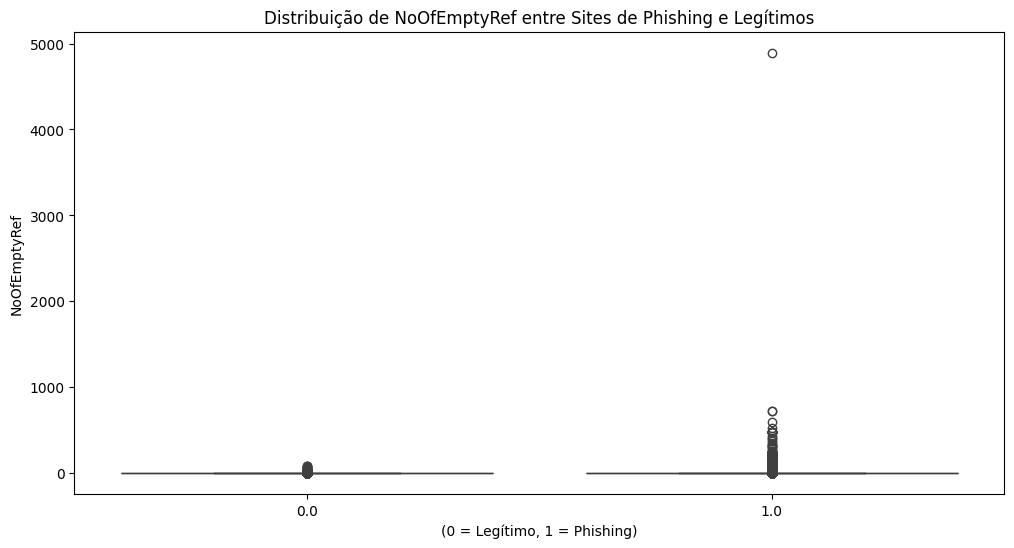

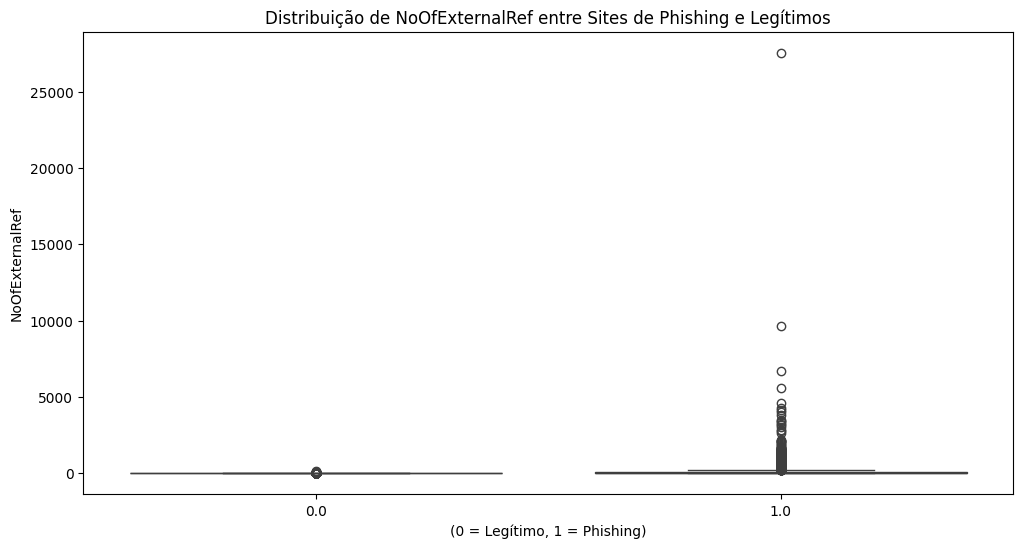

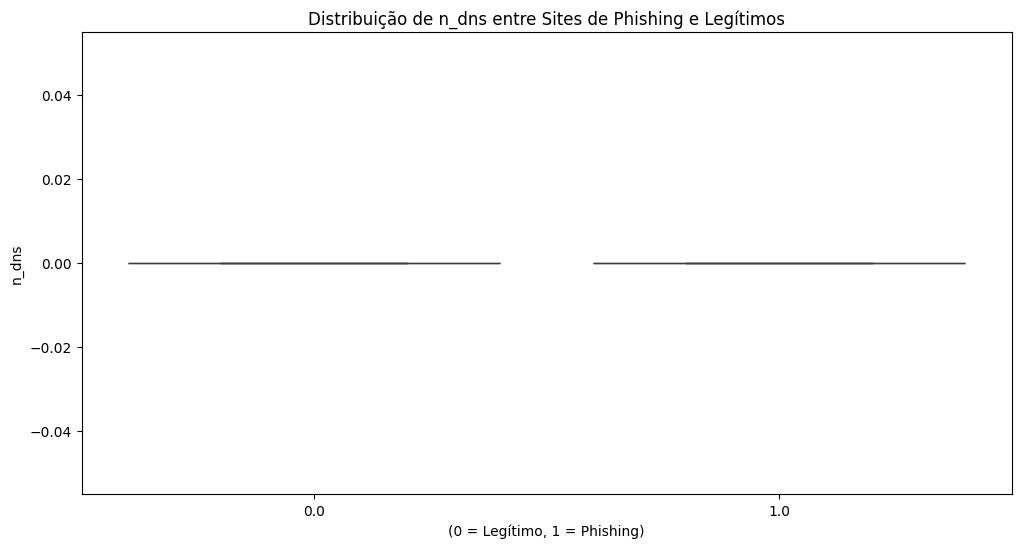

In [434]:
# Plot the boxplots for each numeric column
for column in numeric_columns:
    if column in df.columns:
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='label',y=column, data=df)
        plt.title(f'Distribuição de {column} entre Sites de Phishing e Legítimos')
        plt.xlabel('(0 = Legítimo, 1 = Phishing)')
        plt.ylabel(column)
        plt.show()

# Remoção de colunas

In [435]:
#TLDLegitimateProb, é removida por o conjunto das probilidades caso seja ataque ou não é muito semelhante
df = df.drop(columns='TLDLegitimateProb')

#TLDLength
df = df.drop(columns='TLDLength')

#Latitude e longitude, já temos a localização do país
df = df.drop(columns='Longitude')
df=df.drop(columns='Latitude')

#Postal
df=df.drop(columns='Postal')

#TimeZone
df=df.drop(columns='Timezone')

#IP, o que interessa é a informação sobre o ip, e não o próprio IP
df=df.drop(columns='IP')

#n_dns, toda a coluna está preenchida com o valor 0 
df=df.drop(columns='n_dns')

#IsDomainIP, porque está preenchida com poucos valores de 1
print(df["IsDomainIP"].value_counts())
df=df.drop(columns='n_dns')

In [436]:
print(df.count())

URLLength                     52657
DomainLength                  52657
IsDomainIP                    52657
TLD                           52657
URLSimilarityIndex            52657
CharContinuationRate          52657
URLCharProb                   52657
NoOfSubDomain                 52657
HasObfuscation                52657
NoOfObfuscatedChar            52657
ObfuscationRatio              52657
NoOfLettersInURL              52657
LetterRatioInURL              52657
NoOfDegitsInURL               52657
DegitRatioInURL               52657
NoOfEqualsInURL               52657
NoOfQMarkInURL                52657
NoOfAmpersandInURL            52657
NoOfOtherSpecialCharsInURL    52657
SpacialCharRatioInURL         52657
IsHTTPS                       52657
LineOfCode                    52657
LargestLineLength             52657
HasTitle                      52657
DomainTitleMatchScore         52657
URLTitleMatchScore            52657
HasFavicon                    52657
IsResponsive                

# Remoção de outliers

In [437]:
def filter_and_delete_rows_by_threshold(df, column_name, threshold_value):
    filtered_rows = df[df[column_name] > threshold_value]
    df.drop(filtered_rows.index, inplace=True)
    return filtered_rows

# Lista de colunas e seus respectivos valores de limiar
column_thresholds = {
    'URLLength': 200,
    'DomainLength': 60,
    'NoOfSubDomain':5,
    'NoOfObfuscatedChar':20,
    'ObfuscationRatio':0.05,
    'NoOfLettersInURL':150,
    'NoOfDegitsInURL':50,
    'DegitRatioInURL':0.4,
    'NoOfEqualsInURL':5,
    'NoOfQMarkInURL':2,
    'NoOfAmpersandInURL':2,
    'NoOfOtherSpecialCharsInURL':10,
    'SpacialCharRatioInURL':0.2,
    'LineOfCode':25000,
    'LargestLineLength':25000,
    'NoOfPopup':50,
    'NoOfiFrame':15,
    'NoOfImage':150,
    'NoOfCSS':3500,
    'NoOfJS':100,
    'NoOfSelfRef':300,
    'NoOfEmptyRef':50,
    'NoOfExternalRef':200

    # Adicione mais colunas e seus valores de limiar conforme necessário
}

# Dicionário para armazenar o número de linhas filtradas para cada coluna
num_filtered_deleted_rows  = {}
drop_df=df
# Iterar sobre as colunas e aplicar a filtragem e exclusão
for column, threshold in column_thresholds.items():
    filtered_deleted_df = filter_and_delete_rows_by_threshold(drop_df, column, threshold)
    num_filtered_deleted_rows[column] = len(filtered_deleted_df)

# Imprimir o número de linhas filtradas e deletadas para cada coluna
for column, count in num_filtered_deleted_rows.items():
    print(f"Número de linhas filtradas e deletadas para a coluna '{column}': {count}")

print(df.count())
print("*+++++++++++++++++*")
print(drop_df.count())


Número de linhas filtradas e deletadas para a coluna 'URLLength': 169
Número de linhas filtradas e deletadas para a coluna 'DomainLength': 446
Número de linhas filtradas e deletadas para a coluna 'NoOfSubDomain': 4
Número de linhas filtradas e deletadas para a coluna 'NoOfObfuscatedChar': 3
Número de linhas filtradas e deletadas para a coluna 'ObfuscationRatio': 38
Número de linhas filtradas e deletadas para a coluna 'NoOfLettersInURL': 5
Número de linhas filtradas e deletadas para a coluna 'NoOfDegitsInURL': 20
Número de linhas filtradas e deletadas para a coluna 'DegitRatioInURL': 204
Número de linhas filtradas e deletadas para a coluna 'NoOfEqualsInURL': 6
Número de linhas filtradas e deletadas para a coluna 'NoOfQMarkInURL': 2
Número de linhas filtradas e deletadas para a coluna 'NoOfAmpersandInURL': 4
Número de linhas filtradas e deletadas para a coluna 'NoOfOtherSpecialCharsInURL': 498
Número de linhas filtradas e deletadas para a coluna 'SpacialCharRatioInURL': 11
Número de linh

# Matriz de correlação

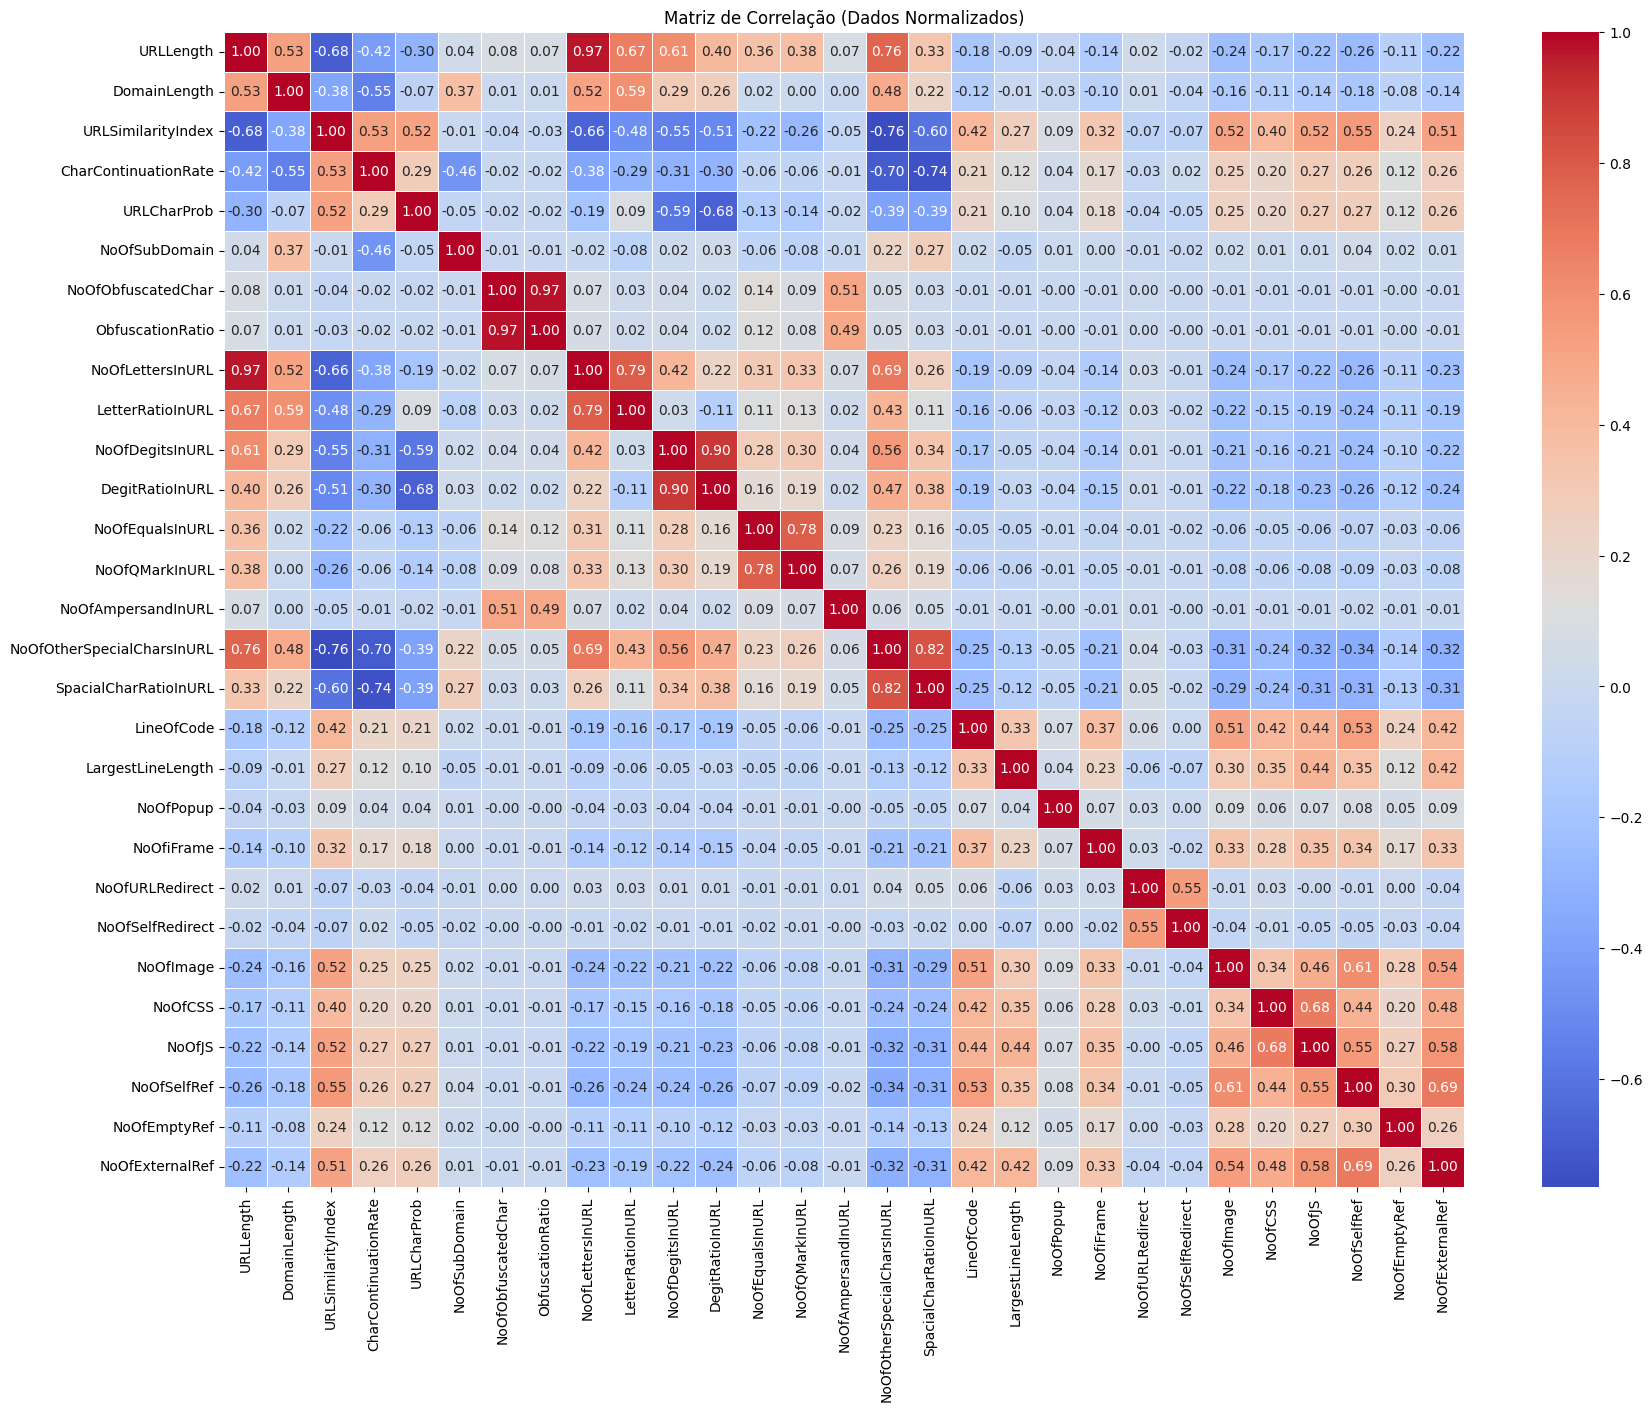

In [438]:

from sklearn.preprocessing import StandardScaler
import os

# Lista de colunas numéricas que podem ser relevantes para análise de phishing
numeric_columns = [
    'URLLength', 'DomainLength', 'URLSimilarityIndex', 'CharContinuationRate', 
    'URLCharProb', 'NoOfSubDomain', 
    'NoOfObfuscatedChar', 'ObfuscationRatio', 'NoOfLettersInURL', 'LetterRatioInURL', 
    'NoOfDegitsInURL', 'DegitRatioInURL', 'NoOfEqualsInURL', 'NoOfQMarkInURL', 
    'NoOfAmpersandInURL', 'NoOfOtherSpecialCharsInURL', 'SpacialCharRatioInURL', 
    'LineOfCode', 'LargestLineLength', 'NoOfPopup', 'NoOfiFrame', 'NoOfURLRedirect', 
    'NoOfSelfRedirect', 'NoOfImage', 'NoOfCSS', 'NoOfJS', 'NoOfSelfRef', 
    'NoOfEmptyRef', 'NoOfExternalRef'
]

# Filtrar o DataFrame para incluir apenas as colunas numéricas
numeric_df = df[numeric_columns]

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Converter os dados normalizados de volta para um DataFrame
df_corr = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calcular a matriz de correlação
correlation_matrix = df_corr.corr()


# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()




# Remoção de colunas com alta 

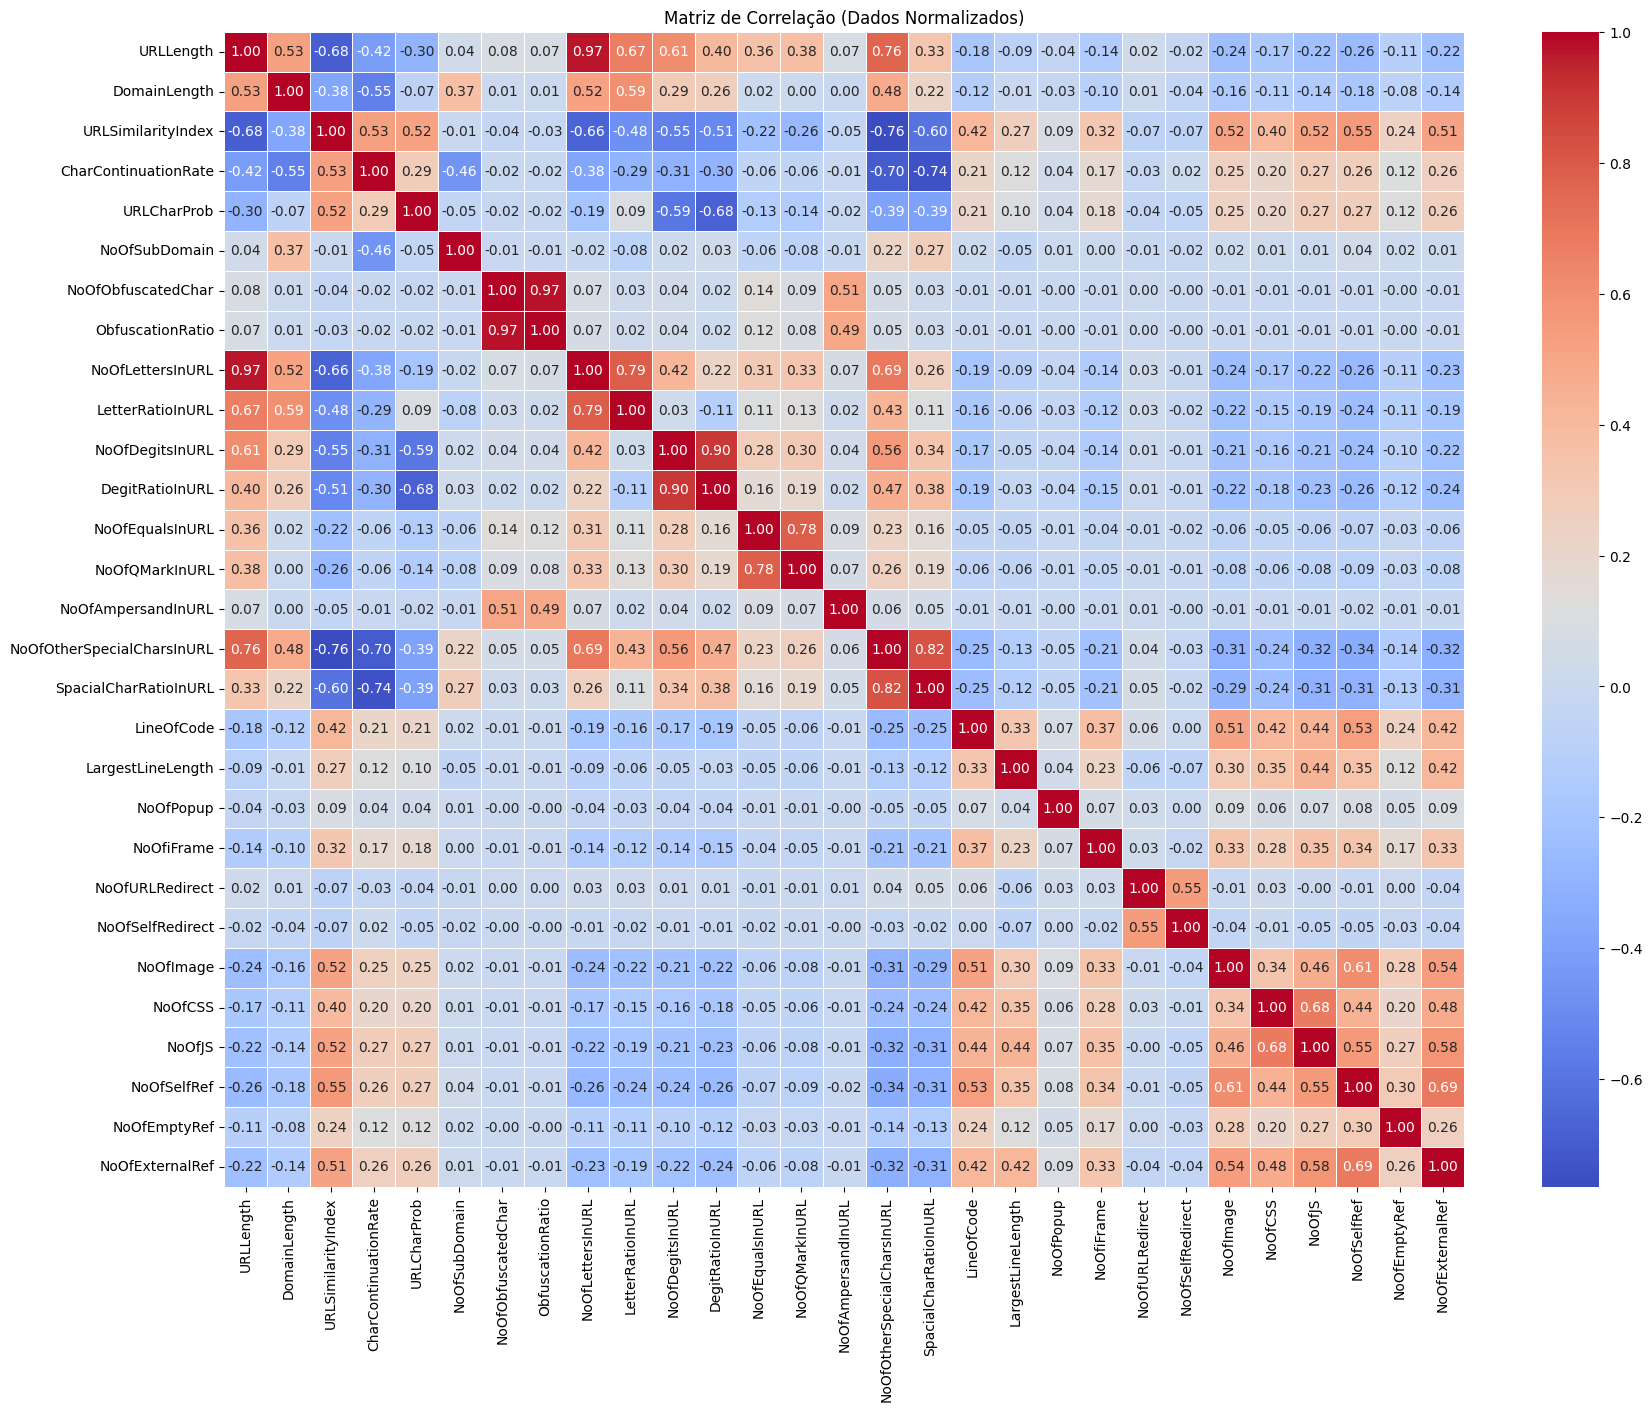

In [439]:

colunas_para_remover = [
    'LetterRatioInURL',  # Altamente correlacionada com NoOfLettersInURL
    'DomainLength',      # Altamente correlacionada com URLLength
    'LetterRatioInURL',  # Altamente correlacionada com NoOfObfuscatedChar
]

df_reduzido = df.drop(columns=colunas_para_remover)

# Normalizar os dados
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numeric_df)

# Converter os dados normalizados de volta para um DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=numeric_columns)

# Calcular a matriz de correlação
correlation_matrix = normalized_df.corr()

# Plotar a matriz de correlação como um mapa de calor
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlação (Dados Normalizados)')
plt.show()


In [443]:
print("count: ",df.count())

df=df.astype('float64')

print(df.dtypes)
df.to_csv('Datasets/total_treated.csv', index=False, sep=';')

count:  URLLength                     43895
DomainLength                  43895
IsDomainIP                    43895
TLD                           43895
URLSimilarityIndex            43895
CharContinuationRate          43895
URLCharProb                   43895
NoOfSubDomain                 43895
HasObfuscation                43895
NoOfObfuscatedChar            43895
ObfuscationRatio              43895
NoOfLettersInURL              43895
LetterRatioInURL              43895
NoOfDegitsInURL               43895
DegitRatioInURL               43895
NoOfEqualsInURL               43895
NoOfQMarkInURL                43895
NoOfAmpersandInURL            43895
NoOfOtherSpecialCharsInURL    43895
SpacialCharRatioInURL         43895
IsHTTPS                       43895
LineOfCode                    43895
LargestLineLength             43895
HasTitle                      43895
DomainTitleMatchScore         43895
URLTitleMatchScore            43895
HasFavicon                    43895
IsResponsive        